# 0. Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

Customer behaviour during churn:

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

# 1. Loading dependencies & datasets

Lets start by loading our dependencies. We can keep adding any imports to this cell block, as we write mode and mode code.

In [59]:
!pip install missingno


[notice] A new release of pip is available: 22.0.4 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [60]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# To show all columns while displaying data frame
pd.set_option('display.max_columns', None)
# To avoid truncating column values
pd.set_option("display.max_colwidth", None)
# To avoid truncating rows
pd.set_option("display.max_rows", None)

Next, we load our datasets and the data dictionary file.

The **train.csv** file contains both dependent and independent features, while the **test.csv** contains only the independent variables. 

So, for model selection, I will create our own train/test dataset from the **train.csv** and use the model to predict the solution using the features in unseen test.csv data for submission.

In [61]:
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(36, 2)


In [62]:
data_dict

Acronyms  \
0     CIRCLE_ID   
1           LOC   
2           STD   
3            IC   
4            OG   
5           T2T   
6       T2M       
7       T2O       
8       T2F       
9       T2C       
10     ARPU       
11      MOU       
12      AON       
13     ONNET      
14   OFFNET       
15         ROAM   
16       SPL      
17      ISD       
18     RECH       
19      NUM       
20      AMT       
21      MAX       
22     DATA       
23       3G       
24       AV       
25      VOL       
26       2G       
27      PCK       
28    NIGHT       
29  MONTHLY       
30    SACHET      
31      *.6       
32      *.7       
33      *.8       
34      FB_USER   
35      VBC       

                                                                          Description  
0                                Telecom circle area to which the customer belongs to  
1                                             Local calls  within same telecom circle  
2                                               STD calls  outside the calling circle  
3                                                                      Incoming calls  
4                                                                      Outgoing calls  
5                            Operator T to T ie within same operator mobile to mobile  
6                                                 Operator T to other operator mobile  
7                                             Operator T to other operator fixed line  
8                                                      Operator T to fixed lines of T  
9                                                   Operator T to its own call center  
10                                                           Average revenue per user  
11                                                      Minutes of usage  voice calls  
12        Age on network  number of days the customer is using the operator T network  
13                                 All kind of calls within the same operator network  
14                                   All kind of calls outside the operator T network  
15                         Indicates that customer is in roaming zone during the call  
16                                                                      Special calls  
17                                                                          ISD calls  
18                                                                           Recharge  
19                                                                             Number  
20                                                           Amount in local currency  
21                                                                            Maximum  
22                                                                    Mobile internet  
23                                                                          G network  
24                                                                            Average  
25                                                 Mobile internet usage volume in MB  
26                                                                          G network  
27                                              Prepaid service schemes called  PACKS  
28                                     Scheme to use during specific night hours only  
29                                Service schemes with validity equivalent to a month  
30                                 Service schemes with validity smaller than a month  
31                                                          KPI for the month of June  
32                                                          KPI for the month of July  
33                                                        KPI for the month of August  
34   Service scheme to avail services of Facebook and similar social networking sites  
35  Volume based cost  when no specific scheme is not purchased and paid as per usage

In [63]:
data.columns.to_frame()

0
id                                              id
circle_id                                circle_id
loc_og_t2o_mou                      loc_og_t2o_mou
std_og_t2o_mou                      std_og_t2o_mou
loc_ic_t2o_mou                      loc_ic_t2o_mou
last_date_of_month_6          last_date_of_month_6
last_date_of_month_7          last_date_of_month_7
last_date_of_month_8          last_date_of_month_8
arpu_6                                      arpu_6
arpu_7                                      arpu_7
arpu_8                                      arpu_8
onnet_mou_6                            onnet_mou_6
onnet_mou_7                            onnet_mou_7
onnet_mou_8                            onnet_mou_8
offnet_mou_6                          offnet_mou_6
offnet_mou_7                          offnet_mou_7
offnet_mou_8                          offnet_mou_8
roam_ic_mou_6                        roam_ic_mou_6
roam_ic_mou_7                        roam_ic_mou_7
roam_ic_mou_8                        roam_ic_mou_8
roam_og_mou_6                        roam_og_mou_6
roam_og_mou_7                        roam_og_mou_7
roam_og_mou_8                        roam_og_mou_8
loc_og_t2t_mou_6                  loc_og_t2t_mou_6
loc_og_t2t_mou_7                  loc_og_t2t_mou_7
loc_og_t2t_mou_8                  loc_og_t2t_mou_8
loc_og_t2m_mou_6                  loc_og_t2m_mou_6
loc_og_t2m_mou_7                  loc_og_t2m_mou_7
loc_og_t2m_mou_8                  loc_og_t2m_mou_8
loc_og_t2f_mou_6                  loc_og_t2f_mou_6
loc_og_t2f_mou_7                  loc_og_t2f_mou_7
loc_og_t2f_mou_8                  loc_og_t2f_mou_8
loc_og_t2c_mou_6                  loc_og_t2c_mou_6
loc_og_t2c_mou_7                  loc_og_t2c_mou_7
loc_og_t2c_mou_8                  loc_og_t2c_mou_8
loc_og_mou_6                          loc_og_mou_6
loc_og_mou_7                          loc_og_mou_7
loc_og_mou_8                          loc_og_mou_8
std_og_t2t_mou_6                  std_og_t2t_mou_6
std_og_t2t_mou_7                  std_og_t2t_mou_7
std_og_t2t_mou_8                  std_og_t2t_mou_8
std_og_t2m_mou_6                  std_og_t2m_mou_6
std_og_t2m_mou_7                  std_og_t2m_mou_7
std_og_t2m_mou_8                  std_og_t2m_mou_8
std_og_t2f_mou_6                  std_og_t2f_mou_6
std_og_t2f_mou_7                  std_og_t2f_mou_7
std_og_t2f_mou_8                  std_og_t2f_mou_8
std_og_t2c_mou_6                  std_og_t2c_mou_6
std_og_t2c_mou_7                  std_og_t2c_mou_7
std_og_t2c_mou_8                  std_og_t2c_mou_8
std_og_mou_6                          std_og_mou_6
std_og_mou_7                          std_og_mou_7
std_og_mou_8                          std_og_mou_8
isd_og_mou_6                          isd_og_mou_6
isd_og_mou_7                          isd_og_mou_7
isd_og_mou_8                          isd_og_mou_8
spl_og_mou_6                          spl_og_mou_6
spl_og_mou_7                          spl_og_mou_7
spl_og_mou_8                          spl_og_mou_8
og_others_6                            og_others_6
og_others_7                            og_others_7
og_others_8                            og_others_8
total_og_mou_6                      total_og_mou_6
total_og_mou_7                      total_og_mou_7
total_og_mou_8                      total_og_mou_8
loc_ic_t2t_mou_6                  loc_ic_t2t_mou_6
loc_ic_t2t_mou_7                  loc_ic_t2t_mou_7
loc_ic_t2t_mou_8                  loc_ic_t2t_mou_8
loc_ic_t2m_mou_6                  loc_ic_t2m_mou_6
loc_ic_t2m_mou_7                  loc_ic_t2m_mou_7
loc_ic_t2m_mou_8                  loc_ic_t2m_mou_8
loc_ic_t2f_mou_6                  loc_ic_t2f_mou_6
loc_ic_t2f_mou_7                  loc_ic_t2f_mou_7
loc_ic_t2f_mou_8                  loc_ic_t2f_mou_8
loc_ic_mou_6                          loc_ic_mou_6
loc_ic_mou_7                          loc_ic_mou_7
loc_ic_mou_8                          loc_ic_mou_8
std_ic_t2t_mou_6                  std_ic_t2t_mou_6
std_ic_t2t_mou_7    

From the above list of columns, check the uniqueness of id

In [64]:
len(data.id.unique())

69999

As id is a unique value, we can set it as index

In [65]:
data = data.set_index('id')

We can see that some of the columns above are in a different format - jun_vbc_3g, aug_vbc_3g. We will rename them to match the format of the other colmns, which ends with month number.

In [66]:
data = data.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)

The dates fields will not be useful in the analysis. We can drop the date fields to reduce the complexity of the model.

In [67]:
dates = [i for i in list(data.columns) if re.search('date',i)]
data = data.drop(dates, axis=1)

Let's check the number of unique values for each columns. If we find any columns with 1 value, its not useful for analysis and can be dropped.

In [68]:
pd.DataFrame({'Unique Counts': data.nunique()}).sort_values(by='Unique Counts')

Unique Counts
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
std_ic_t2o_mou_8                1
std_ic_t2o_mou_7                1
std_ic_t2o_mou_6                1
std_og_t2c_mou_8                1
std_og_t2c_mou_7                1
std_og_t2c_mou_6                1
fb_user_8                       2
fb_user_7                       2
fb_user_6                       2
night_pck_user_8                2
night_pck_user_7                2
night_pck_user_6                2
churn_probability               2
monthly_2g_6                    5
monthly_2g_7                    6
monthly_2g_8                    6
monthly_3g_6                   10
monthly_3g_8                   12
monthly_3g_7                   13
count_rech_3g_6                23
sachet_3g_6                    23
sachet_3g_7                    26
count_rech_3g_7                27
sachet_3g_8                    28
count_rech_3g_8                29
sachet_2g_6                    30
count_rech_2g_6                30
sachet_2g_8                    32
sachet_2g_7                    33
count_rech_2g_7                33
count_rech_2g_8                33
total_rech_data_6              36
total_rech_data_7              41
total_rech_data_8              44
max_rech_data_7                45
max_rech_data_6                47
max_rech_data_8                49
spl_ic_mou_6                   78
total_rech_num_8               92
total_rech_num_6               94
spl_ic_mou_8                   95
total_rech_num_7               96
spl_ic_mou_7                  103
og_others_7                   148
last_day_rch_amt_7            166
max_rech_amt_7                178
last_day_rch_amt_6            179
og_others_8                   179
max_rech_amt_6                190
last_day_rch_amt_8            191
max_rech_amt_8                202
av_rech_amt_data_6            792
av_rech_amt_data_7            837
av_rech_amt_data_8            855
og_others_6                   914
isd_og_mou_8                 1008
isd_og_mou_7                 1084
isd_og_mou_6                 1103
ic_others_6                  1523
ic_others_8                  1565
ic_others_7                  1658
std_og_t2f_mou_8             1945
loc_og_t2c_mou_6             1945
std_og_t2f_mou_7             1991
std_og_t2f_mou_6             2074
loc_og_t2c_mou_7             2103
total_rech_amt_6             2108
total_rech_amt_7             2147
total_rech_amt_8             2149
loc_og_t2c_mou_8             2204
std_ic_t2f_mou_8             2583
std_ic_t2f_mou_6             2624
std_ic_t2f_mou_7             2695
loc_og_t2f_mou_8             3311
loc_og_t2f_mou_7             3365
loc_og_t2f_mou_6             3376
aon                          3455
spl_og_mou_6                 3503
spl_og_mou_7                 3827
spl_og_mou_8                 3848
roam_ic_mou_7                4240
roam_ic_mou_8                4252
isd_ic_mou_6                 4421
isd_ic_mou_7                 4640
isd_ic_mou_8                 4694
arpu_2g_7                    5056
arpu_2g_8                    5132
roam_og_mou_8                5215
roam_og_mou_7                5305
roam_ic_mou_6                5306
std_ic_t2t_mou_6             5323
std_ic_t2t_mou_8             5367
arpu_3g_7                    5389
arpu_2g_6                    5389
std_ic_t2t_mou_7             5479
arpu_3g_6                    5506
arpu_3g_8                    5816
loc_ic_t2f_mou_8             6092
loc_ic_t2f_mou_6             6200
loc_ic_t2f_mou_7             6287
roam_og_mou_6                6568
std_ic_t2m_mou_8             7906
std_ic_t2m_mou_6             7931
std_ic_t2m_mou_7             8033
vbc_3g_6                     9617
vol_3g_mb_6                  9768
std_ic_mou_6                 9876
std_ic_mou_8                 9939
std_ic_mou_7                10112
vbc_3g_7                    10257
vol_3g_mb_7                 10296
vbc_3g_8                    10609
vol_3g_mb_8                 10663
loc_og_t

We can drop the columns with 1 unique value

In [69]:
unique_count_df = pd.DataFrame({'Unique Counts': data.nunique()}).sort_values(by='Unique Counts')
unique_count_cols = unique_count_df[unique_count_df['Unique Counts'] == 1].index.to_list()
data = data.drop(unique_count_cols, axis=1)

We can assign the columns with two unique values as category

In [70]:
category_col_df = pd.DataFrame({'Unique Counts': data.nunique()}).sort_values(by='Unique Counts')
category_cols = unique_count_df[unique_count_df['Unique Counts'] == 2].index.to_list()
data[category_cols] = data[category_cols].astype('category')

Let's look at each variable's datatype:

In [71]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 69999 entries, 0 to 69998
Data columns (total 152 columns):
 #    Column              Dtype   
---   ------              -----   
 0    arpu_6              float64 
 1    arpu_7              float64 
 2    arpu_8              float64 
 3    onnet_mou_6         float64 
 4    onnet_mou_7         float64 
 5    onnet_mou_8         float64 
 6    offnet_mou_6        float64 
 7    offnet_mou_7        float64 
 8    offnet_mou_8        float64 
 9    roam_ic_mou_6       float64 
 10   roam_ic_mou_7       float64 
 11   roam_ic_mou_8       float64 
 12   roam_og_mou_6       float64 
 13   roam_og_mou_7       float64 
 14   roam_og_mou_8       float64 
 15   loc_og_t2t_mou_6    float64 
 16   loc_og_t2t_mou_7    float64 
 17   loc_og_t2t_mou_8    float64 
 18   loc_og_t2m_mou_6    float64 
 19   loc_og_t2m_mou_7    float64 
 20   loc_og_t2m_mou_8    float64 
 21   loc_og_t2f_mou_6    float64 
 22   loc_og_t2f_mou_7    float64 
 23   loc_og_t2f_mou

Let's also summarize the features using the df.describe method:

In [72]:
data.describe(include="all")

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count   69999.000000  69999.000000  69999.000000  67231.000000  67312.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      283.134365    278.185912    278.858826    133.153275    133.894438   
std       334.213918    344.366927    351.924315    299.963093    311.277193   
min     -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
25%        93.581000     86.714000     84.095000      7.410000      6.675000   
50%       197.484000    191.588000    192.234000     34.110000     32.280000   
75%       370.791000    365.369500    369.909000    119.390000    115.837500   
max     27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

         onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count   66296.000000  67231.000000  67312.000000  66296.000000   67231.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean      132.978257    198.874771    197.153383    196.543577       9.765435   
std       311.896596    316.818355    322.482226    324.089234      57.374429   
min         0.000000      0.000000      0.000000      0.000000       0.000000   
25%         6.410000     34.860000     32.240000     31.575000       0.000000   
50%        32.100000     96.480000     91.885000     91.800000       0.000000   
75%       115.060000    232.990000    227.630000    229.345000       0.000000   
max     10752.560000   8362.360000   7043.980000  14007.340000    2850.980000   

        roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count    67312.000000   66296.000000   67231.000000   67312.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         7.014568       7.004892      14.186457       9.842191   
std         55.960985      53.408135      73.469261      58.511894   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.000000       0.000000       0.000000   
50%          0.000000       0.000000       0.000000       0.000000   
75%          0.000000       0.000000       0.000000       0.000000   
max       4155.830000    4169.810000    3775.110000    2812.040000   

        roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count    66296.000000      67231.000000      67312.000000      66296.000000   
unique            NaN               NaN               NaN               NaN   
top               NaN               NaN               NaN               NaN   
freq              NaN               NaN               NaN               NaN   
mean         9.771783         46.904854         46.166503         45.686109   
std         64.618388        150.971758        154.739002        153.716880   
min          0.000000          0.000000          0.000000          0.000000   
25%          0.000000          1.660000          1.650000          1.610000   
50%          0.000000         11.910000         11.580000         11.740000   
75%          0.000000         40.740000         39.760000         39.895000   
max       5337.040000       6431.330000       7400.660000      10752.560000   

        loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count       67231.000000      67312.000000      66296.000000   
unique               NaN               NaN               NaN   
top                  NaN               NaN               NaN   
freq                 NaN          

# Exploratory Data Analysis & Preprocessing

Lets start by analysing the univariate distributions of each feature.

## Univariate analysis

**Age on Network**

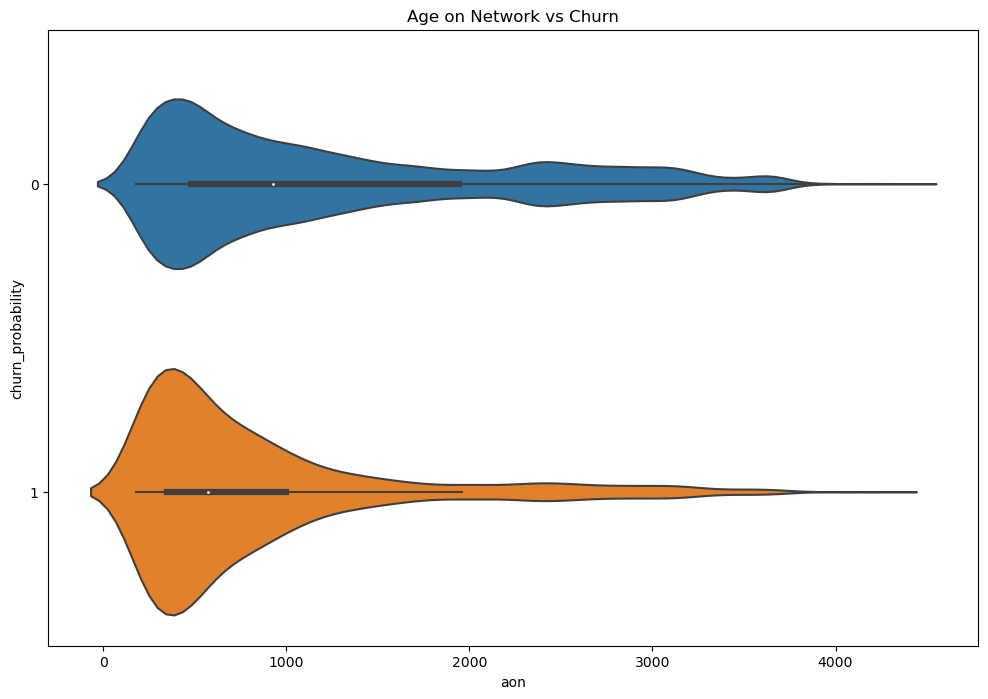

In [73]:
plt.figure(figsize=(12,8))
sns.violinplot(x=data['aon'], y=data['churn_probability'].astype('category'))
plt.title('Age on Network vs Churn')
plt.show()

From the above, in general most users are having lesser age on network. But among them, the churning usually happens if the aon is less.

In [74]:
def num_univariate_analysis(dataframe, column_names,scale='linear'):
    fig = plt.figure(figsize=(16,12))
    for idx, column_name in enumerate(column_names):
        ax = fig.add_subplot(1,len(column_names),idx + 1)
        sns.violinplot(x='churn_probability', y = column_name, data = dataframe, ax=ax)
        title = ''.join(column_name) + ' vs Churn'
        ax.set(title=title)
        if scale == 'log' :
            plt.yscale('log')
            ax.set(ylabel= column_name + '(Log Scale)')

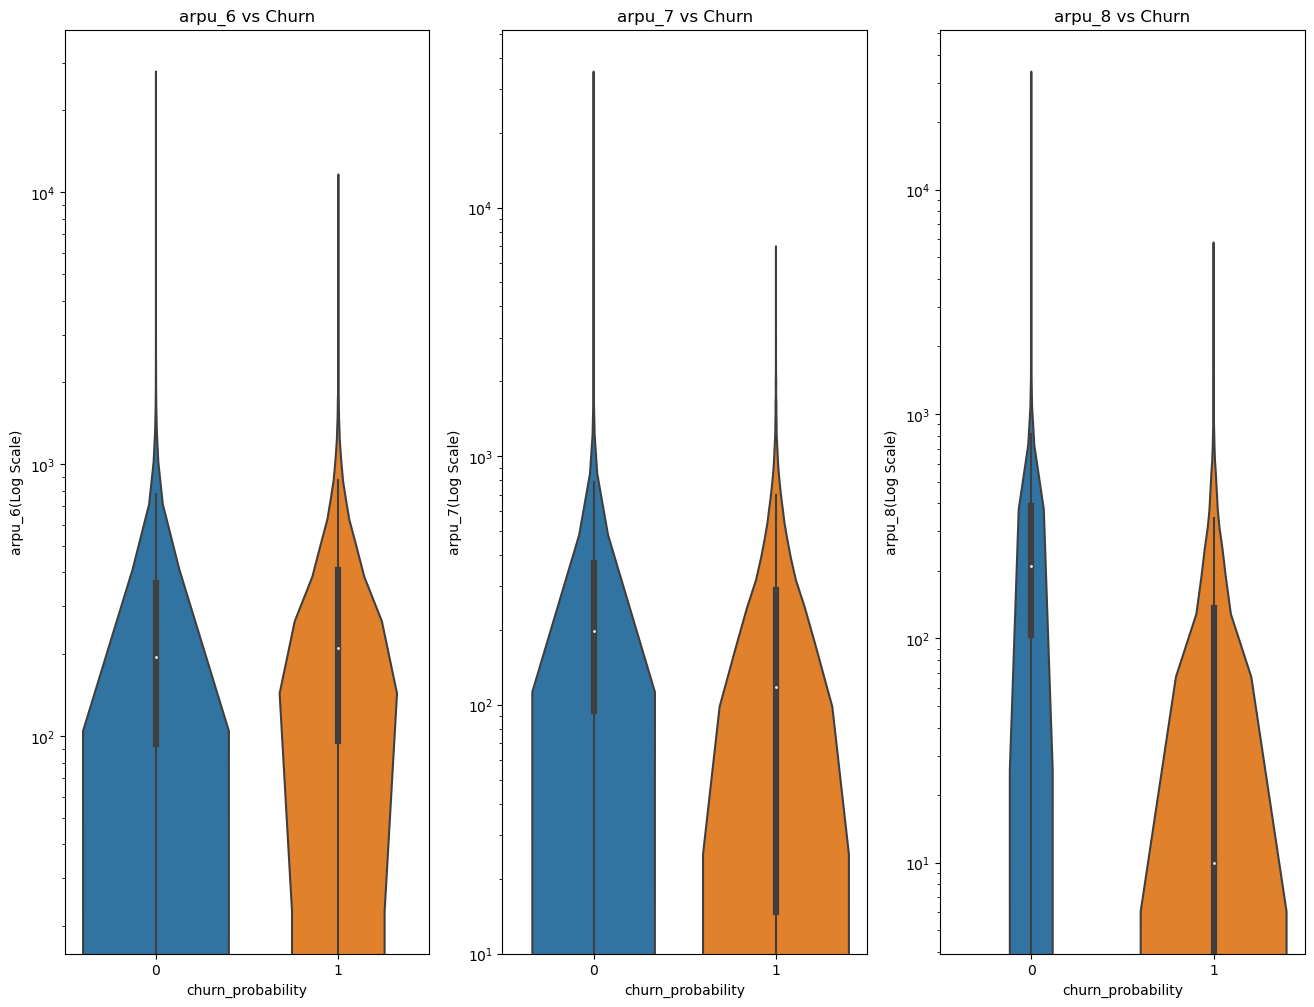

In [75]:
columns = ['arpu_6','arpu_7','arpu_8']
num_univariate_analysis(data, columns, scale='log')

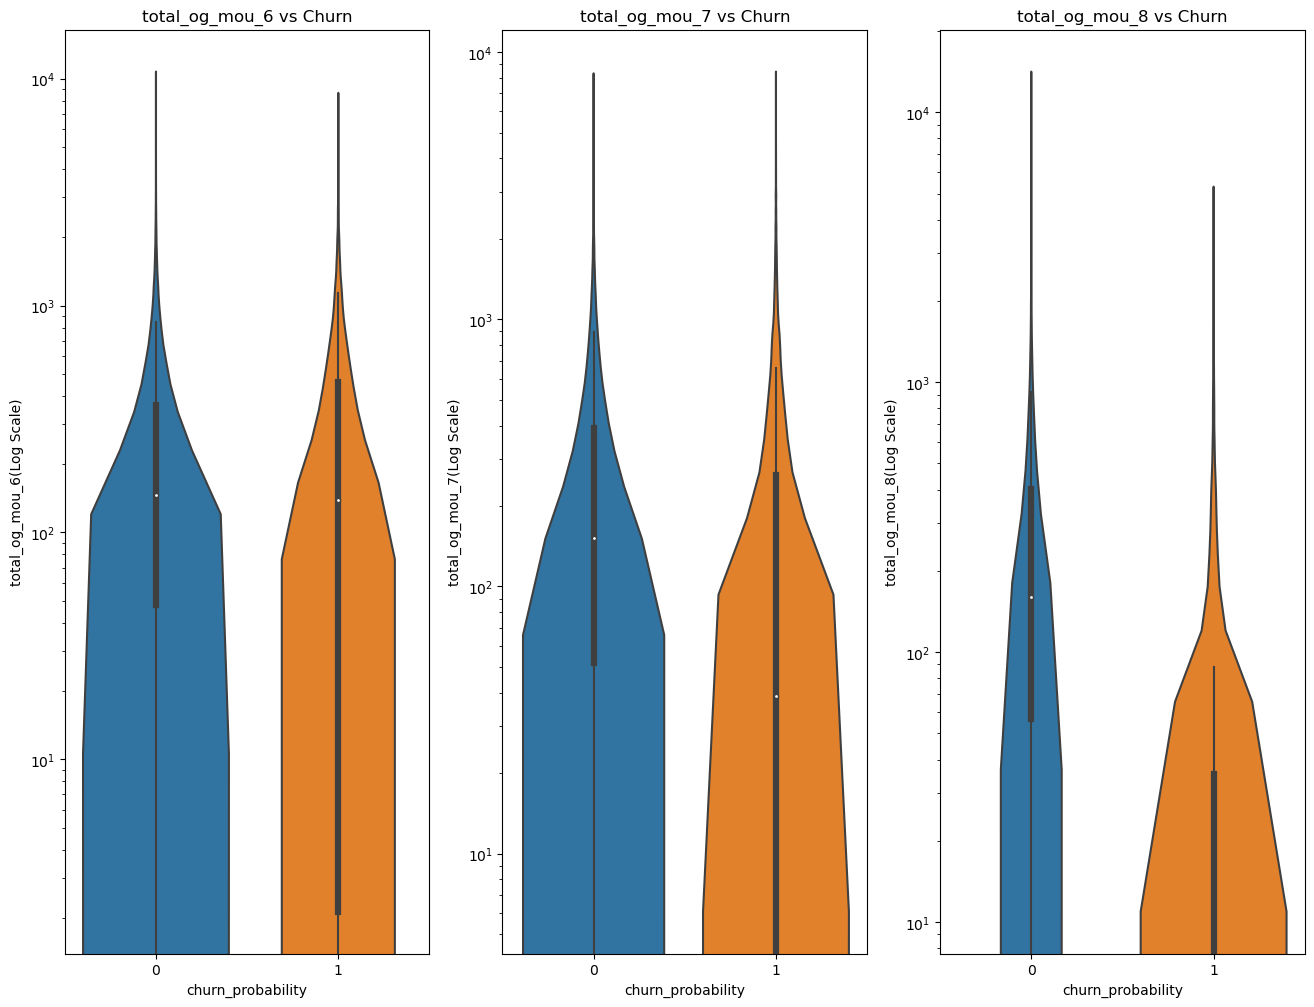

In [76]:
columns = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
num_univariate_analysis(data, columns, 'log')

## Bivariate Analysis

**'total_og_mou_6' vs 'total_og_mou_8' with respect to Churn**

<Axes: xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

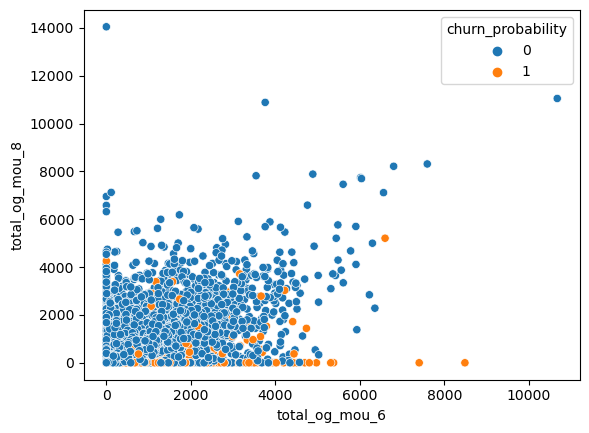

In [77]:
sns.scatterplot(x=data['total_og_mou_6'],y=data['total_og_mou_8'],hue=data['churn_probability'])

**'total_og_mou_7' vs 'total_og_mou_8' with respect to Churn**

<Axes: xlabel='total_og_mou_7', ylabel='total_og_mou_8'>

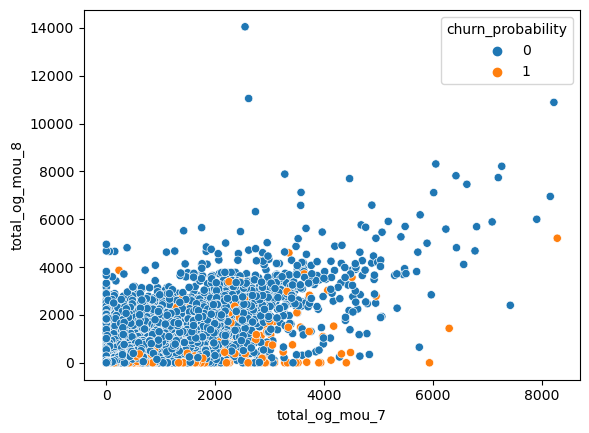

In [78]:
sns.scatterplot(x=data['total_og_mou_7'],y=data['total_og_mou_8'],hue=data['churn_probability'])

**'aon' vs 'total_og_mou_8' with respect to Churn**

<Axes: xlabel='aon', ylabel='total_og_mou_8'>

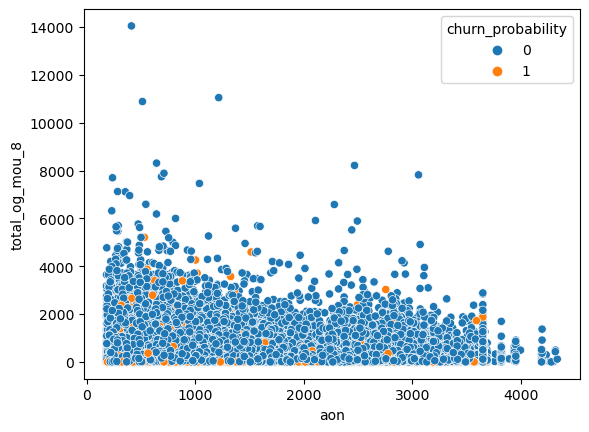

In [79]:
sns.scatterplot(x=data['aon'],y=data['total_og_mou_8'],hue=data['churn_probability'])

<Axes: xlabel='aon', ylabel='total_ic_mou_8'>

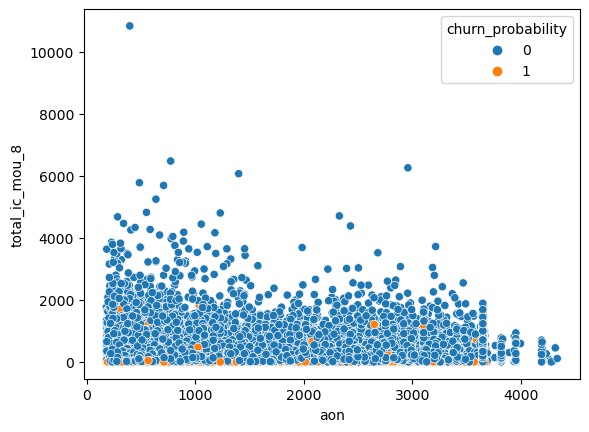

In [80]:
sns.scatterplot(x=data['aon'],y=data['total_ic_mou_8'],hue=data['churn_probability'])

**'max_rech_amt_6' vs 'max_rech_amt_8' with respect to 'Churn'**

<Axes: xlabel='max_rech_amt_6', ylabel='max_rech_amt_8'>

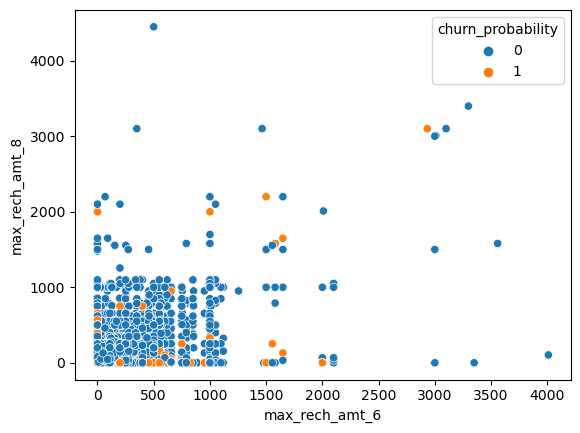

In [81]:
sns.scatterplot(x=data['max_rech_amt_6'],y=data['max_rech_amt_8'],hue=data['churn_probability'])

**Correlation Analysis**

In [82]:
# function to correlate variables
def correlation(dataframe) : 
    columnsForAnalysis = [x for x in dataframe.columns.to_list() if x != 'churn_probability']
    cor0=dataframe[columnsForAnalysis].corr()
    type(cor0)
    cor0.where(np.triu(np.ones(cor0.shape),k=1).astype(np.bool))
    cor0=cor0.unstack().reset_index()
    cor0.columns=['VAR1','VAR2','CORR']
    cor0.dropna(subset=['CORR'], inplace=True)
    cor0.CORR=round(cor0['CORR'],2)
    cor0.CORR=cor0.CORR.abs()
    cor0.sort_values(by=['CORR'],ascending=False)
    cor0=cor0[~(cor0['VAR1']==cor0['VAR2'])]

    # removing duplicate correlations
    cor0['pair'] = cor0[['VAR1', 'VAR2']].apply(lambda x: '{}-{}'.format(*sorted((x[0], x[1]))), axis=1)
    
    cor0 = cor0.drop_duplicates(subset=['pair'], keep='first')
    cor0 = cor0[['VAR1', 'VAR2','CORR']]
    return pd.DataFrame(cor0.sort_values(by=['CORR'],ascending=False))

In [83]:
# Correlations for Churn : 0  - non churn customers
# Absolute values are reported
cor_0 = correlation(data)

# filtering for correlations >= 40%
condition = cor_0['CORR'] > 0.4
cor_0 = cor_0[condition]
cor_0.style.background_gradient(cmap='GnBu')

In the first two months, which is good phase, we will find the average usage, and we will find how much the usage has reduced in the churn month.

In [84]:
def derive_variables(dataframe):
    data['delta_vol_2g'] = data['vol_2g_mb_8'] - data['vol_2g_mb_6'].add(data['vol_2g_mb_7']).div(2)
    data['delta_vol_3g'] = data['vol_3g_mb_8'] - data['vol_3g_mb_6'].add(data['vol_3g_mb_7']).div(2)
    data['delta_total_og_mou'] = data['total_og_mou_8'] - data['total_og_mou_6'].add(data['total_og_mou_7']).div(2)
    data['delta_total_ic_mou'] = data['total_ic_mou_8'] - data['total_ic_mou_6'].add(data['total_ic_mou_7']).div(2)
    data['delta_vbc_3g'] = data['vbc_3g_8'] - data['vbc_3g_6'].add(data['vbc_3g_7']).div(2)
    
    data['delta_arpu'] = data['arpu_8'] - data['arpu_6'].add(data['arpu_7']).div(2)
    data['delta_total_rech_amt'] = data['total_rech_amt_8'] - data['total_rech_amt_6'].add(data['total_rech_amt_7']).div(2)
    
    # Removing variables used for derivation : 
    data.drop(columns=[
     'vol_2g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
      'vol_3g_mb_8'  , 'vol_3g_mb_6', 'vol_3g_mb_7' ,
        'total_og_mou_8','total_og_mou_6', 'total_og_mou_7', 
        'total_ic_mou_8','total_ic_mou_6', 'total_ic_mou_7',
        'vbc_3g_8','vbc_3g_6','vbc_3g_7',
        'arpu_8','arpu_6','arpu_7',
        'total_rech_amt_8', 'total_rech_amt_6', 'total_rech_amt_7'

    ], inplace=True)

# Handling Missing data

First lets analyse the missing data. We can use missingno library for quick visualizations.

<Axes: >

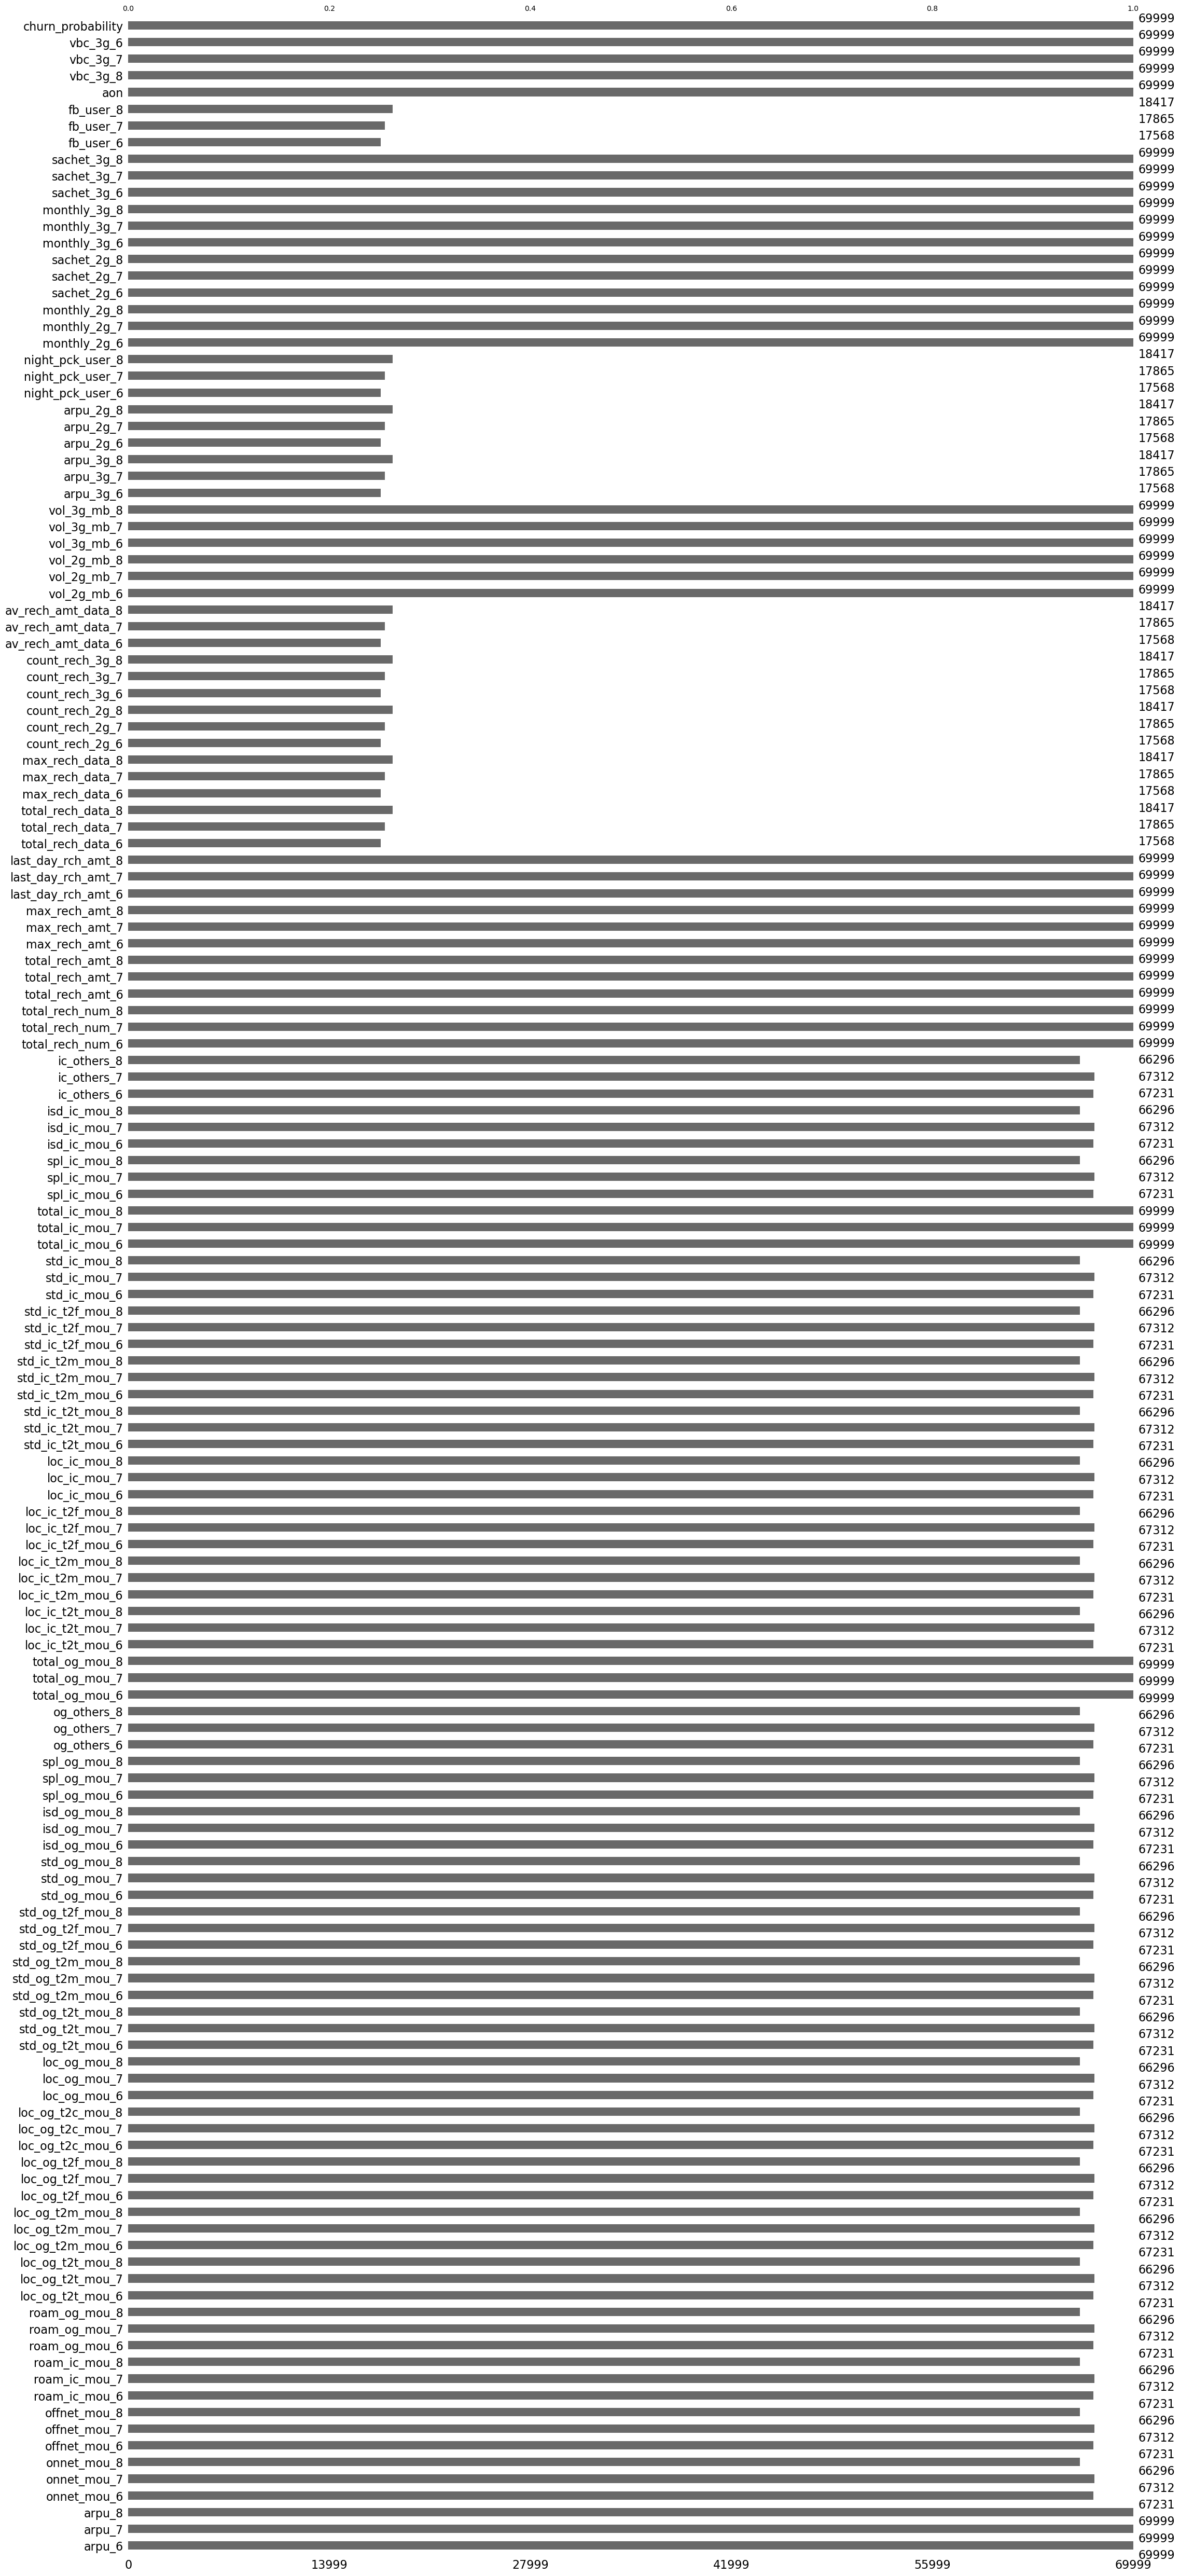

In [85]:
msno.bar(data)

<Axes: >

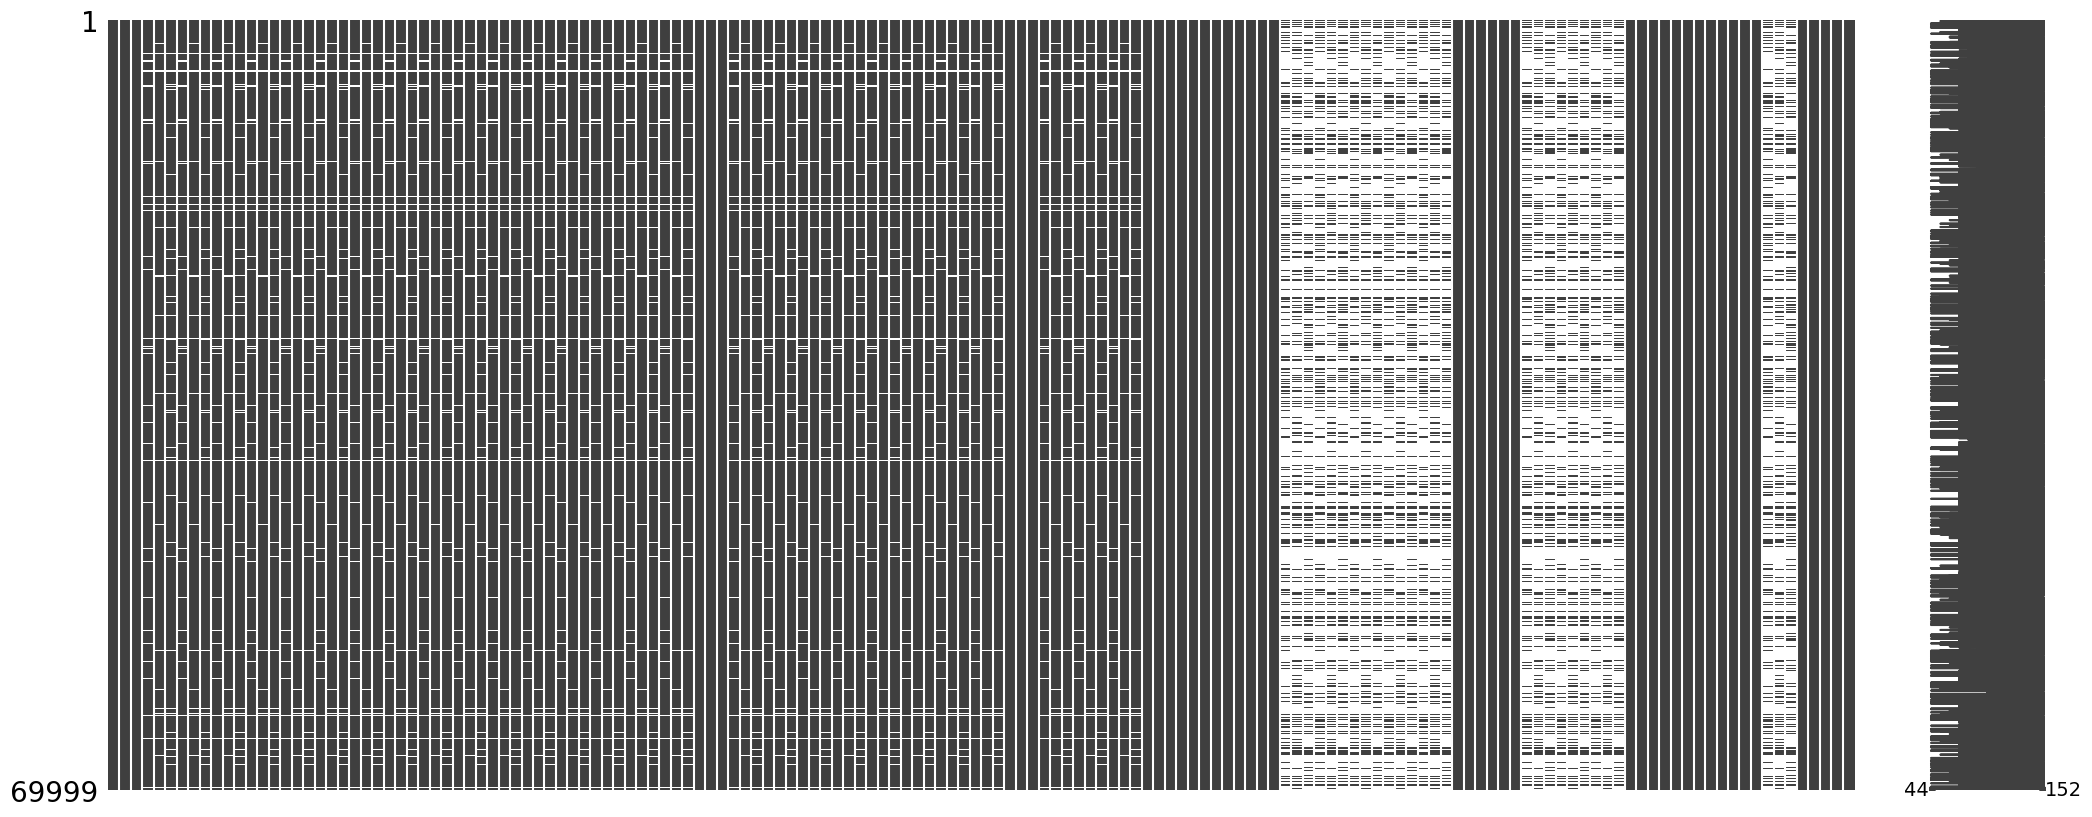

In [86]:
msno.matrix(data)

Lets also calculate the % missing data for each column:

In [87]:
missing_data_percent = 100*data.isnull().sum()/len(data)
missing_data_percent

arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            3.954342
onnet_mou_7            3.838626
onnet_mou_8            5.290076
offnet_mou_6           3.954342
offnet_mou_7           3.838626
offnet_mou_8           5.290076
roam_ic_mou_6          3.954342
roam_ic_mou_7          3.838626
roam_ic_mou_8          5.290076
roam_og_mou_6          3.954342
roam_og_mou_7          3.838626
roam_og_mou_8          5.290076
loc_og_t2t_mou_6       3.954342
loc_og_t2t_mou_7       3.838626
loc_og_t2t_mou_8       5.290076
loc_og_t2m_mou_6       3.954342
loc_og_t2m_mou_7       3.838626
loc_og_t2m_mou_8       5.290076
loc_og_t2f_mou_6       3.954342
loc_og_t2f_mou_7       3.838626
loc_og_t2f_mou_8       5.290076
loc_og_t2c_mou_6       3.954342
loc_og_t2c_mou_7       3.838626
loc_og_t2c_mou_8       5.290076
loc_og_mou_6           3.954342
loc_og_mou_7           3.838626
loc_og_mou_8           5.290076
std_og_t2t_mou_6       3.954342
std_og_t

Since too much missing information would make a column not really a great predictor for churn, we drop these columns and keep only the ones which have less than 40% missing data.

In [88]:
new_vars = missing_data_percent[missing_data_percent.le(40)].index
new_vars

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'churn_probability'],
      dtype='object', length=125)

In [89]:
data = data[new_vars]
data.shape
new_vars = [x for x in new_vars if x != 'churn_probability']

Next, we try imputation on variables with any amount of missing data still left. There are multiple ways of imputing data, and each will require a good business understanding of what the missing data is and how you may handle it.

In our case, the missing value mostly indicates there is no usage. So the missing values can be set as 0.


In [90]:
missing_data_percent = data.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

In [91]:
imp = SimpleImputer(strategy='constant', fill_value=0)
data[impute_cols] = imp.fit_transform(data[impute_cols])

<Axes: >

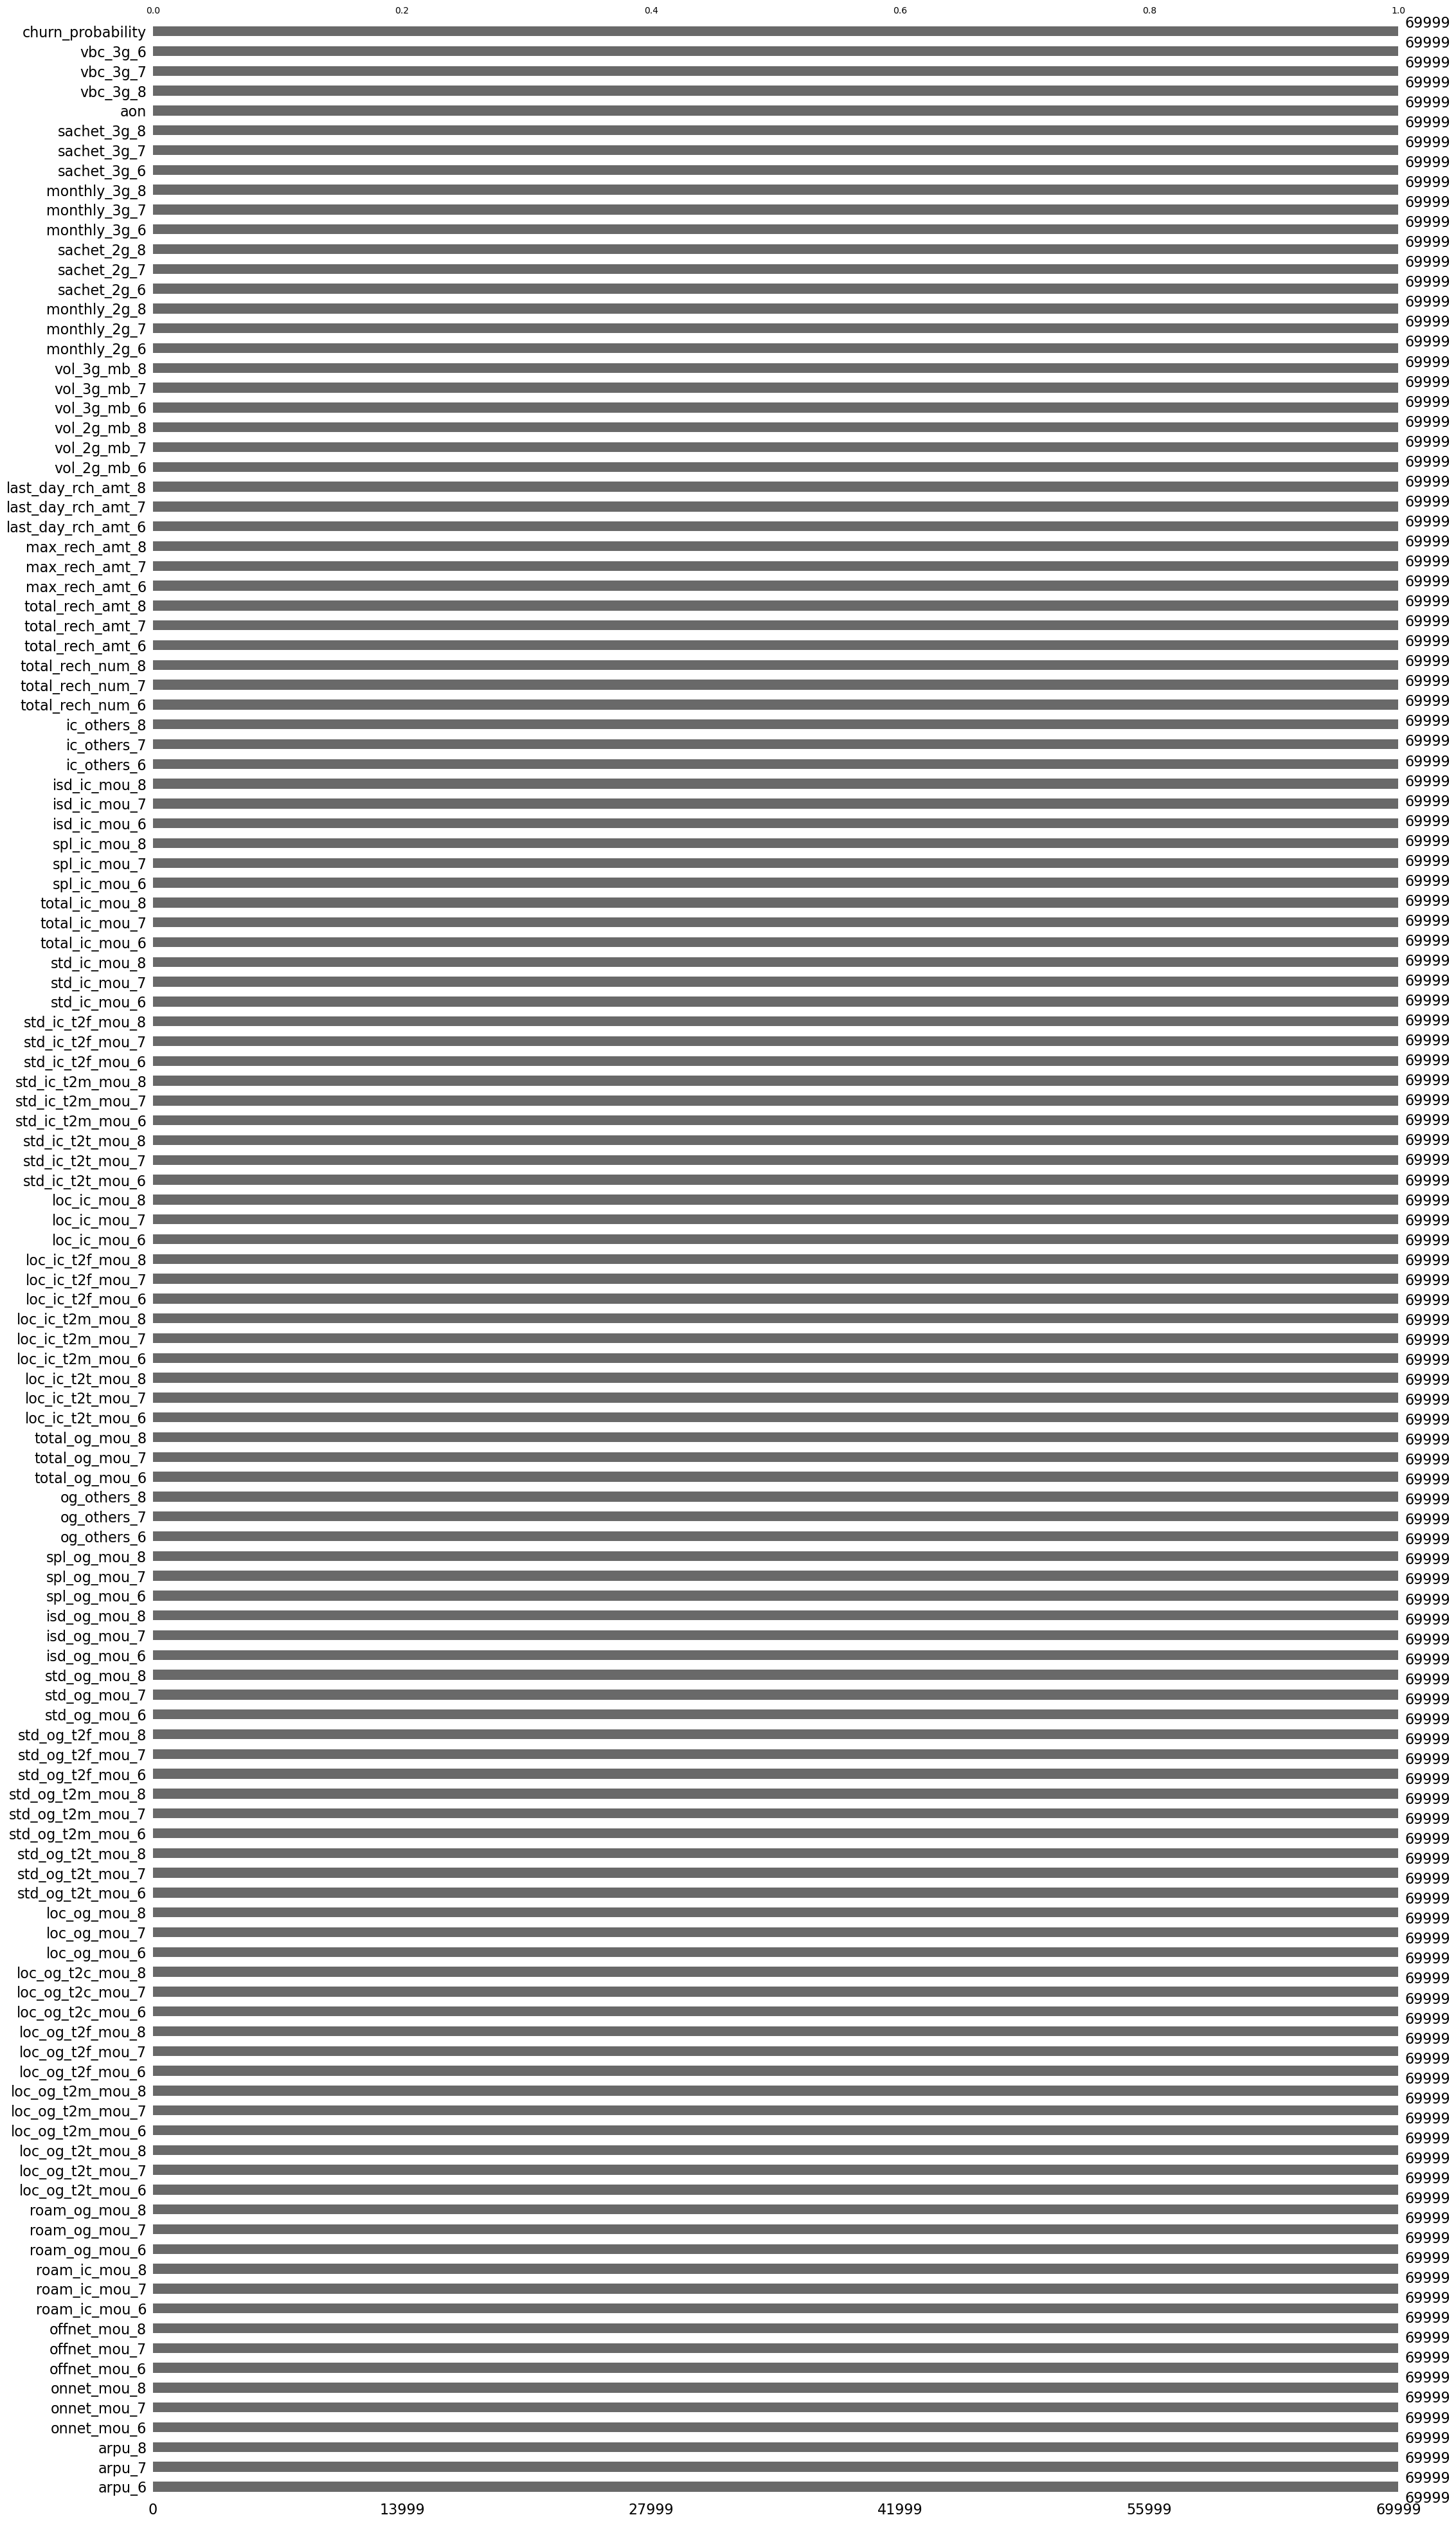

In [92]:
msno.bar(data)

In [93]:
data.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean     283.134365    278.185912    278.858826    127.887939    128.754731   
std      334.213918    344.366927    351.924315    295.115497    306.326345   
min    -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
25%       93.581000     86.714000     84.095000      5.430000      4.910000   
50%      197.484000    191.588000    192.234000     30.830000     29.160000   
75%      370.791000    365.369500    369.909000    113.100000    108.940000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000   69999.000000   
mean     125.943607    191.010582    189.585401    186.146273       9.379276   
std      304.990552    312.900706    318.492632    318.453812      56.260778   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        4.110000     28.790000     26.690000     23.780000       0.000000   
50%       27.840000     89.810000     85.590000     83.010000       0.000000   
75%      106.280000    223.540000    218.350000    216.410000       0.000000   
max    10752.560000   8362.360000   7043.980000  14007.340000    2850.980000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   69999.000000   69999.000000   69999.000000   69999.000000   
mean        6.745305       6.634328      13.625476       9.464386   
std        54.892940      51.999899      72.055036      57.409013   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4155.830000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   69999.000000      69999.000000      69999.000000      69999.000000   
mean        9.254848         45.050076         44.394344         43.269280   
std        62.923987        148.238746        151.998993        149.944829   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          1.010000          1.010000          0.760000   
50%         0.000000         10.660000         10.430000         10.060000   
75%         0.000000         38.680000         37.780000         37.260000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean          89.551272         87.313796         86.301054          3.595161   
std          159.846546        151.875981        150.286404         13.073900   
min            0.000000          0.000000          0.000000          0.000000   
25%            7.290000          7.530000          6.440000          0.000000   
50%           37.680000         37.010000         35.940000          0.000000   
75%          105.685000        103.330000        103.110000          1.860000   
max         4696.830000       4557.140000       4961.330000        617.580000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean           3.632045          3.467948          1.081499          1.308807   
std           13.324919         12.686917          5.631416          7.765132   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.0000

# Handling outliers

The box plots of these features show there a lot of outliers. These can be capped with k-sigma method.

In [94]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [95]:
predictor_cols = [x for x in data.columns.to_list() if x != 'churn_probability'] 
data[predictor_cols].dtypes

arpu_6                float64
arpu_7                float64
arpu_8                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f_mou_8      float64
loc_og_t2c_mou_6      float64
loc_og_t2c_mou_7      float64
loc_og_t2c_mou_8      float64
loc_og_mou_6          float64
loc_og_mou_7          float64
loc_og_mou_8          float64
std_og_t2t_mou_6      float64
std_og_t2t_mou_7      float64
std_og_t2t_mou_8      float64
std_og_t2m

In [96]:
predictor_cols = [x for x in data.columns.to_list() if x != 'churn_probability'] 
data[predictor_cols] = data[predictor_cols].apply(cap_outliers, axis=0)
data.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
id                                                                     
0    31.277   87.009    7.527        48.58       124.38         1.29   
1     0.000  122.787   42.953         0.00         0.00         0.00   
2    60.806  103.176    0.000         0.53        15.93         0.00   
3   156.362  205.260  111.095         7.26        16.01         0.00   
4   240.708  128.191  101.565        21.28         4.83         6.13   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
id                                                                           
0          32.24         96.68          2.33           0.00            0.0   
1           0.00         25.99         30.89           0.00            0.0   
2          53.99         82.05          0.00           0.00            0.0   
3          68.76         78.48         50.23           0.00            0.0   
4          56.99         38.11          9.63          53.64            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
id                                                               
0             0.0           0.00            0.0           0.00   
1             0.0           0.00            0.0           0.00   
2             0.0           0.00            0.0           0.00   
3             0.0           0.00            0.0           1.63   
4             0.0          15.73            0.0           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
id                                                                           
0               2.23              0.00              0.28              5.29   
1               0.00              0.00              0.00              0.00   
2               0.53             12.98              0.00             24.11   
3               6.99              3.94              0.00             37.91   
4              10.16              4.83              6.13             36.74   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
id                                                                           
0              16.04              2.33              0.00              0.00   
1               0.00              0.00              0.00              0.00   
2               0.00              0.00              0.00              0.00   
3              44.89             23.63              0.00              0.00   
4              19.88              4.61             11.99              1.23   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
id                                                                           
0               0.00              0.00              0.00          0.000000   
1               0.00              0.00             22.01         20.469906   
2               0.00              2.14              0.00          0.000000   
3               0.00              0.00              0.00          8.030000   
4               5.01              0.00              9.85          0.000000   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
id                                                               
0           7.53         16.04          2.61             46.34   
1           0.00          0.00          0.00              0.00   
2          24.64         12.98          0.00              0.00   
3          44.91         48.84         23.63              0.26   
4          58.91         25.94         15.76              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
id                                                                           
0             124.38              1.01             18.75             80.61   
1               0.00              0.00              0.00              0.00   
2               2.94              0.00             28.94             82.05

<Axes: >

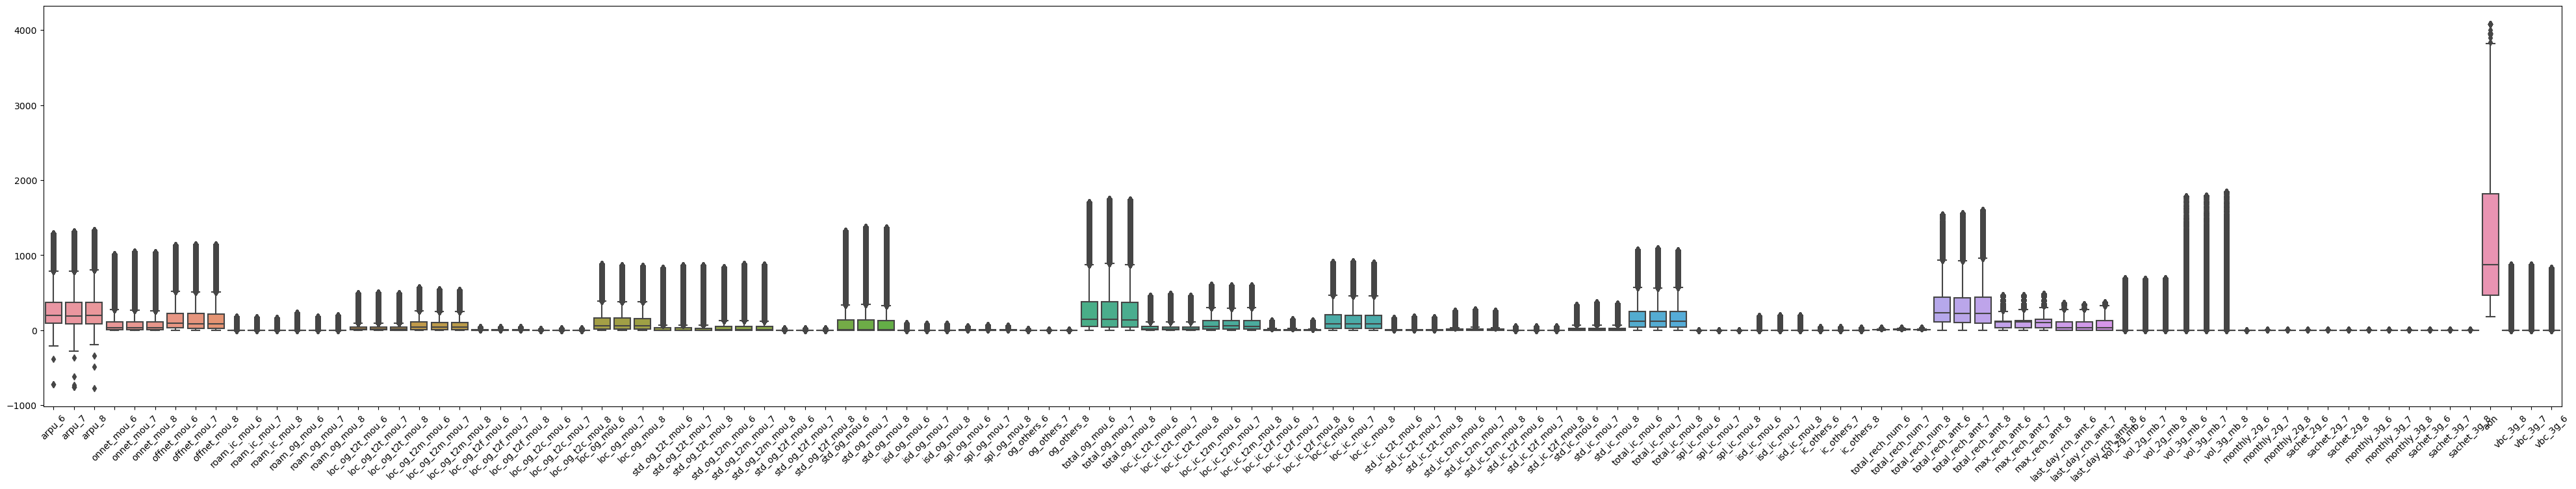

In [97]:
plt.figure(figsize=(50,8))
plt.xticks(rotation=45)
sns.boxplot(data = data)

# Split Train and Test

In [98]:
y = data['churn_probability']
X = data.drop('churn_probability', axis=1)


X.shape, y.shape

((69999, 124), (69999,))

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 124), (14000, 124), (55999,), (14000,))

# Feature scaling

Lets also scale the features by scaling them with Standard scaler (few other alternates are min-max scaling and Z-scaling).

In [100]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)

<Axes: >

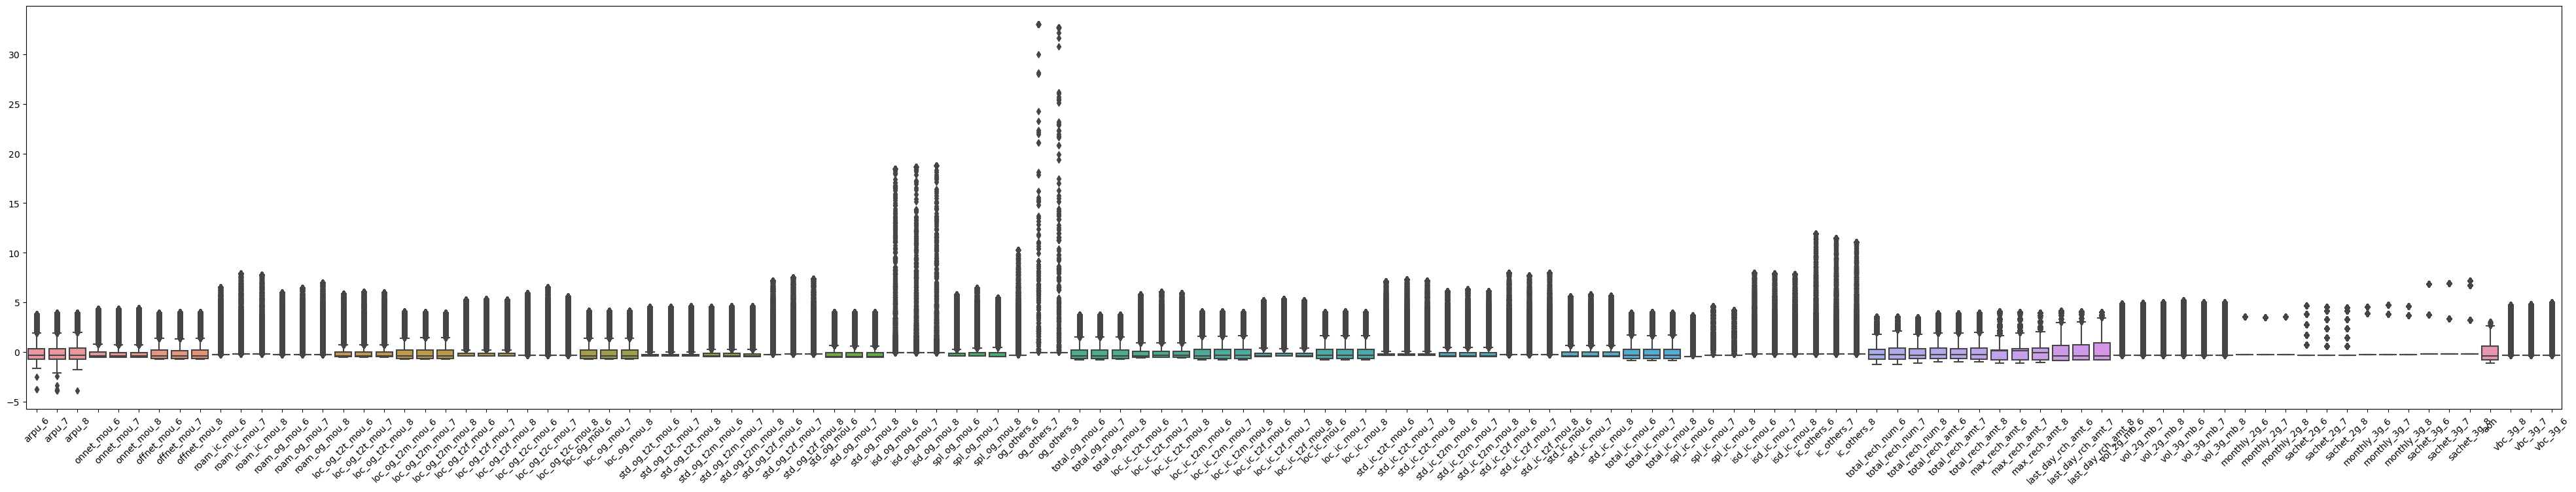

In [101]:
plt.figure(figsize=(50,8))
plt.xticks(rotation=45)
sns.boxplot(data = pd.DataFrame(X_train_scaled, columns=new_vars))

In [102]:
plt.figure(figsize=(100,100))
# sns.heatmap(pd.DataFrame(X_train_scaled, columns=new_vars).corr(), annot=True, cmap='Reds')

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

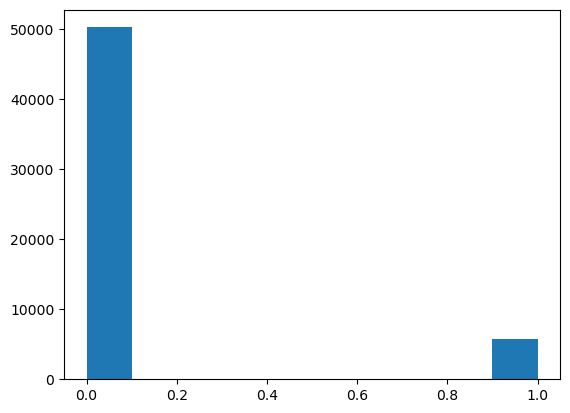

In [103]:
#Distribution for the churn probability
plt.hist(y_train)
plt.show()


# Modelling

## Logistic Regression

We will first build a simple logistic regression model

In [104]:
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression(random_state=100, class_weight='balanced')
baseline_model = baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]

In [105]:
y_train_pred = pd.Series(y_train_pred,index = X_train.index, )
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

In [106]:
# Function for Baseline Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [107]:
# Prediction at threshold of 0.5 
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [108]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[41620  8623]
 [  973  4783]]

Confusion Matrix for test: 
 [[10413  2211]
 [  228  1148]]


In [109]:
# Baseline Model Performance : 

print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.829
Sensitivity / True Positive Rate / Recall : 0.831
Specificity / True Negative Rate :  0.828
Precision / Positive Predictive Value : 0.357
F1-score : 0.499


Test Performance : 

Accuracy : 0.826
Sensitivity / True Positive Rate / Recall : 0.834
Specificity / True Negative Rate :  0.825
Precision / Positive Predictive Value : 0.342
F1-score : 0.485


In [110]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
id                                                     
2691     1    1    1    1    1    1    1    0    0    0
48102    1    1    1    1    1    1    1    0    0    0
9743     1    0    0    0    0    0    0    0    0    0
22357    1    0    0    0    0    0    0    0    0    0
4442     1    1    1    1    1    0    0    0    0    0

In [111]:
# # sensitivity, specificity, accuracy for each threshold
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy

# generating a data frame for metrics for each threshold
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    metrics_df.loc[len(metrics_df.index)] = [sensitivity,specificity,accuracy] 
    
metrics_df.index = thresholds
metrics_df

sensitivity  specificity  accuracy
0.0        1.000        0.000     0.103
0.1        0.969        0.336     0.401
0.2        0.941        0.494     0.540
0.3        0.908        0.623     0.652
0.4        0.872        0.735     0.749
0.5        0.831        0.828     0.829
0.6        0.718        0.896     0.877
0.7        0.505        0.942     0.897
0.8        0.300        0.969     0.900
0.9        0.132        0.986     0.899

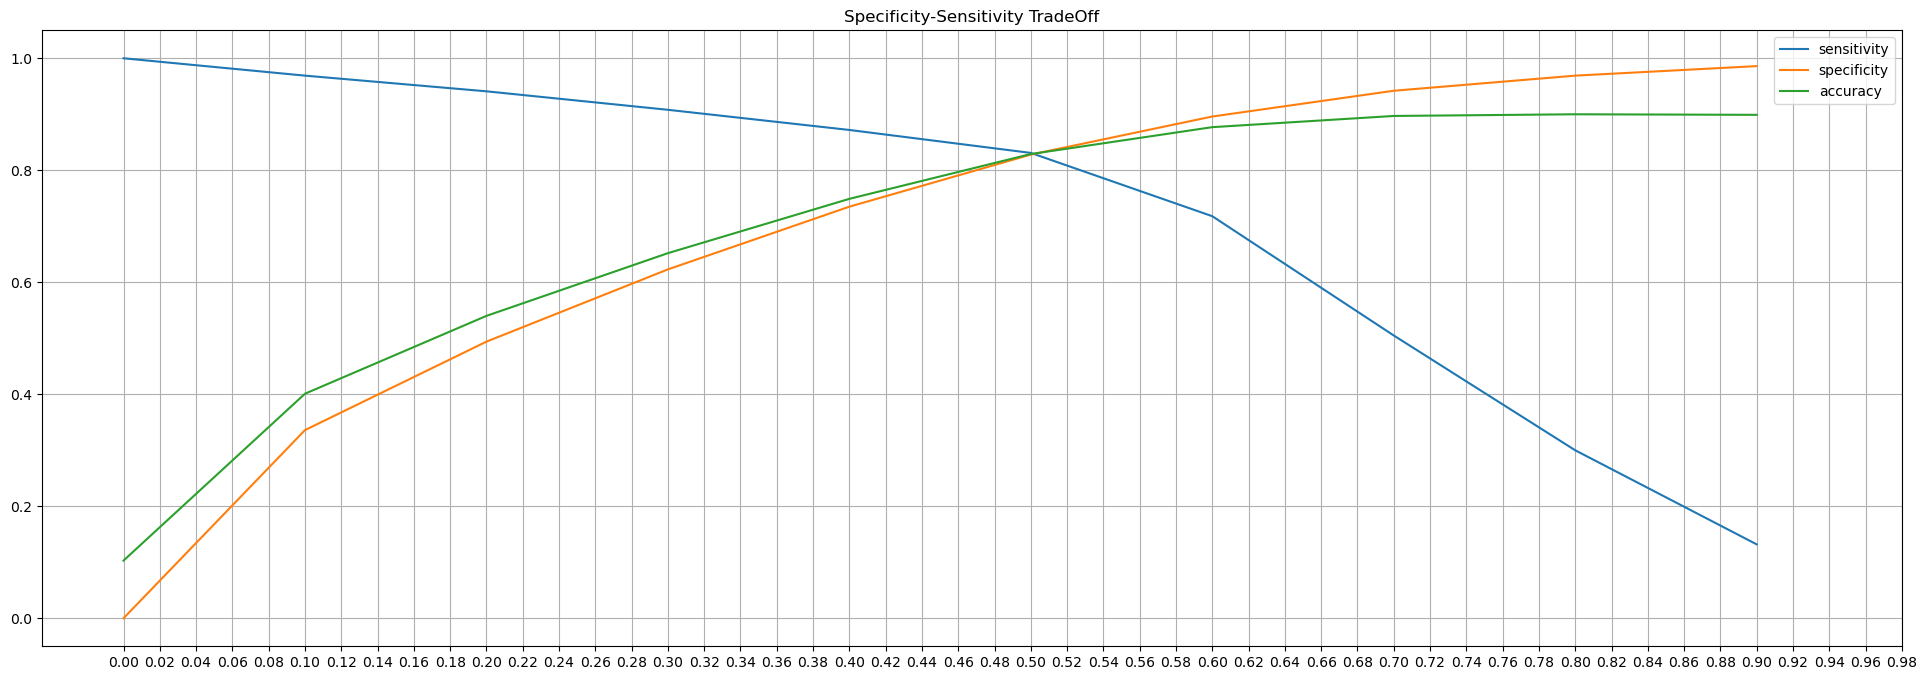

In [112]:
metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

In [113]:
optimum_cutoff = 0.49
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[41226  9017]
 [  941  4815]]

Confusion Matrix for test: 
 [[10320  2304]
 [  223  1153]]


In [114]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.822
Sensitivity / True Positive Rate / Recall : 0.837
Specificity / True Negative Rate :  0.821
Precision / Positive Predictive Value : 0.348
F1-score : 0.492


Test Performance : 

Accuracy : 0.82
Sensitivity / True Positive Rate / Recall : 0.838
Specificity / True Negative Rate :  0.817
Precision / Positive Predictive Value : 0.334
F1-score : 0.478


In [115]:
# ROC_AUC score 
from sklearn.metrics import roc_auc_score
print('ROC AUC score for Train : ',round(roc_auc_score(y_train, y_train_pred),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred),3) )

ROC AUC score for Train :  0.879 

ROC AUC score for Test :  0.877


In [116]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=100 , class_weight='balanced')
rfe = RFE(lr, n_features_to_select=15)
results = rfe.fit(X_train,y_train)
results.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False])

In [118]:
# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

Column  Rank  Support
92     total_rech_num_8     1     True
91     total_rech_num_7     1     True
38     std_og_t2f_mou_8     1     True
90     total_rech_num_6     1     True
89          ic_others_8     1     True
44         isd_og_mou_8     1     True
14        roam_og_mou_8     1     True
26     loc_og_t2c_mou_8     1     True
48          og_others_6     1     True
83         spl_ic_mou_8     1     True
47         spl_og_mou_8     1     True
113         sachet_2g_8     1     True
74     std_ic_t2f_mou_8     1     True
59     loc_ic_t2m_mou_8     1     True
62     loc_ic_t2f_mou_8     1     True
72     std_ic_t2f_mou_6     2    False
101  last_day_rch_amt_8     3    False
17     loc_og_t2t_mou_8     4    False
20     loc_og_t2m_mou_8     5    False
29         loc_og_mou_8     6    False
25     loc_og_t2c_mou_7     7    False
10        roam_ic_mou_7     8    False
56     loc_ic_t2t_mou_8     9    False
77         std_ic_mou_8    10    False
36     std_og_t2f_mou_6    11    False
104         vol_2g_mb_8    12    False
96       max_rech_amt_6    13    False
22     loc_og_t2f_mou_7    14    False
0                arpu_6    15    False
93     total_rech_amt_6    16    False
64         loc_ic_mou_7    17    False
21     loc_og_t2f_mou_6    18    False
67     std_ic_t2t_mou_7    19    False
12        roam_og_mou_6    20    False
88          ic_others_7    21    False
87          ic_others_6    22    False
85         isd_ic_mou_7    23    False
24     loc_og_t2c_mou_6    24    False
73     std_ic_t2f_mou_7    25    False
37     std_og_t2f_mou_7    26    False
5           onnet_mou_8    27    False
8          offnet_mou_8    28    False
41         std_og_mou_8    29    False
55     loc_ic_t2t_mou_7    30    False
58     loc_ic_t2m_mou_7    31    False
95     total_rech_amt_8    32    False
1                arpu_7    33    False
94     total_rech_amt_7    34    False
46         spl_og_mou_7    35    False
45         spl_og_mou_6    36    False
71     std_ic_t2m_mou_8    37    False
2                arpu_8    38    False
11        roam_ic_mou_8    39    False
27         loc_og_mou_6    40    False
18     loc_og_t2m_mou_6    41    False
15     loc_og_t2t_mou_6    42    False
78       total_ic_mou_6    43    False
76         std_ic_mou_7    44    False
79       total_ic_mou_7    45    False
80       total_ic_mou_8    46    False
111         sachet_2g_6    47    False
98       max_rech_amt_8    48    False
23     loc_og_t2f_mou_8    49    False
107         vol_3g_mb_8    50    False
43         isd_og_mou_7    51    False
32     std_og_t2t_mou_8    52    False
42         isd_og_mou_6    53    False
30     std_og_t2t_mou_6    54    False
68     std_ic_t2t_mou_8    55    False
33     std_og_t2m_mou_6    56    False
61     loc_ic_t2f_mou_7    57    False
60     loc_ic_t2f_mou_6    58    False
51       total_og_mou_6    59    False
121            vbc_3g_8    60    False
112         sachet_2g_7    61    False
103         vol_2g_mb_7    62    False
108        monthly_2g_6    63    False
115        monthly_3g_7    64    False
119         sachet_3g_8    65    False
53       total_og_mou_8    66    False
86         isd_ic_mou_8    67    False
13        roam_og_mou_7    68    False
84         isd_ic_mou_6    69    False
35     std_og_t2m_mou_8    70    False
52       total_og_mou_7    71    False
110        monthly_2g_8    72    False
109        monthly_2g_7    73    False
116        monthly_3g_8    74    False
3           onnet_mou_6    75    False
123            vbc_3g_6    76    False
81         spl_ic_mou_6    77    False
114        monthly_3g_6    78    False
118         sachet_3g_7    79    False
69     std_ic_t2m_mou_6    80    False
54     loc_ic_t2t_mou_6    81    False
117         sachet_3g_6    82    False
70     std_ic_t2m_mou_7    83    False
40         std_og_mou_7    84    False
63         loc_ic_mou_6    85    False
34     std_og_t2m_mou_7    86    False
105         vol_3g_mb_6    87    False
9         roam_ic_mou_6    88    False


In [119]:
# RFE Selected columns
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

['total_rech_num_8',
 'total_rech_num_7',
 'std_og_t2f_mou_8',
 'total_rech_num_6',
 'ic_others_8',
 'isd_og_mou_8',
 'roam_og_mou_8',
 'loc_og_t2c_mou_8',
 'og_others_6',
 'spl_ic_mou_8',
 'spl_og_mou_8',
 'sachet_2g_8',
 'std_ic_t2f_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8']

## Logistic Regression with RFE Selected Columns

We will create a model again by feature elimination using RFE

In [120]:
# Logistic Regression Model with RFE columns
import statsmodels.api as sm 


logr = sm.GLM(y_train,(sm.add_constant(X_train[rfe_selected_columns])), family = sm.families.Binomial())
logr_fit = logr.fit()
logr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55983
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13147.
Date:                Wed, 01 Nov 2023   Deviance:                       26294.
Time:                        15:55:17   Pearson chi2:                 1.33e+09
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1753
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6776      0.030    -22.785      0.000      -0.736      -0.619
total_rech_num_8    -0.1666      0.006    -29.315      0.000      -0.178      -0.155
total_rech_num_7     0.0270      0.004      6.465      0.000       0.019       0.035
std_og_t2f_mou_8    -0.0857      0.013     -6.612      0.000      -0.111      -0.060
total_rech_num_6     0.0563      0.003     16.615      0.000       0.050       0.063
ic_others_8         -0.0361      0.011     -3.304      0.001      -0.057      -0.015
isd_og_mou_8         0.0063      0.004      1.546      0.122      -0.002       0.014
roam_og_mou_8        0.0070      0.000     15.719      0.000       0.006       0.008
loc_og_t2c_mou_8     0.0140      0.009      1.624      0.104      -0.003       0.031
og_others_6          0.0231      0.012      1.921      0.055      -0.000       0.047
spl_ic_mou_8        -7.8101      0.516    -15.129      0.000      -8.822      -6.798
spl_og_mou_8        -0.0234      0.004     -6.078      0.000      -0.031      -0.016
sachet_2g_8         -0.2546      0.030     -8.470      0.000      -0.314      -0.196
std_ic_t2f_mou_8    -0.0576      0.010     -5.906      0.000      -0.077      -0.038
loc_ic_t2m_mou_8    -0.0228      0.001    -38.055      0.000      -0.024      -0.022
loc_ic_t2f_mou_8    -0.0306      0.003    -10.310      0.000      -0.036      -0.025
====================================================================================
"""

In [121]:
# Using P-value and vif for manual feature elimination

from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X_train_resampled, logr_fit, selected_columns) : 
    vif = pd.DataFrame()
    vif['Features'] = rfe_selected_columns
    vif['VIF'] = [variance_inflation_factor(X_train_resampled[selected_columns].values, i) for i in range(X_train_resampled[selected_columns].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index('Features')
    vif['P-value'] = round(logr_fit.pvalues,4)
    vif = vif.sort_values(by = ["VIF",'P-value'], ascending = [False,False])
    return vif

vif(X_train, logr_fit, rfe_selected_columns)

VIF  P-value
Features                       
total_rech_num_7  6.59   0.0000
total_rech_num_8  5.29   0.0000
total_rech_num_6  4.46   0.0000
spl_og_mou_8      2.22   0.0000
loc_og_t2c_mou_8  1.86   0.1045
loc_ic_t2m_mou_8  1.85   0.0000
loc_ic_t2f_mou_8  1.37   0.0000
sachet_2g_8       1.26   0.0000
og_others_6       1.25   0.0548
std_ic_t2f_mou_8  1.22   0.0000
std_og_t2f_mou_8  1.16   0.0000
spl_ic_mou_8      1.12   0.0000
roam_og_mou_8     1.07   0.0000
ic_others_8       1.05   0.0010
isd_og_mou_8      1.02   0.1222

In [122]:
selected_columns = rfe_selected_columns
selected_columns.remove('total_rech_num_7')
selected_columns

['total_rech_num_8',
 'std_og_t2f_mou_8',
 'total_rech_num_6',
 'ic_others_8',
 'isd_og_mou_8',
 'roam_og_mou_8',
 'loc_og_t2c_mou_8',
 'og_others_6',
 'spl_ic_mou_8',
 'spl_og_mou_8',
 'sachet_2g_8',
 'std_ic_t2f_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8']

In [123]:
logr2 = sm.GLM(y_train,(sm.add_constant(X_train[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55984
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13168.
Date:                Wed, 01 Nov 2023   Deviance:                       26335.
Time:                        15:55:18   Pearson chi2:                 1.32e+09
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1747
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6462      0.029    -22.001      0.000      -0.704      -0.589
total_rech_num_8    -0.1524      0.005    -29.356      0.000      -0.163      -0.142
std_og_t2f_mou_8    -0.0866      0.013     -6.678      0.000      -0.112      -0.061
total_rech_num_6     0.0662      0.003     21.870      0.000       0.060       0.072
ic_others_8         -0.0359      0.011     -3.286      0.001      -0.057      -0.014
isd_og_mou_8         0.0060      0.004      1.476      0.140      -0.002       0.014
roam_og_mou_8        0.0071      0.000     16.064      0.000       0.006       0.008
loc_og_t2c_mou_8     0.0124      0.009      1.447      0.148      -0.004       0.029
og_others_6          0.0216      0.012      1.796      0.073      -0.002       0.045
spl_ic_mou_8        -7.8566      0.516    -15.213      0.000      -8.869      -6.844
spl_og_mou_8        -0.0225      0.004     -5.870      0.000      -0.030      -0.015
sachet_2g_8         -0.2520      0.030     -8.413      0.000      -0.311      -0.193
std_ic_t2f_mou_8    -0.0578      0.010     -5.919      0.000      -0.077      -0.039
loc_ic_t2m_mou_8    -0.0227      0.001    -37.989      0.000      -0.024      -0.022
loc_ic_t2f_mou_8    -0.0306      0.003    -10.299      0.000      -0.036      -0.025
====================================================================================
"""

In [124]:
# vif and p-values
vif(X_train, logr2_fit, selected_columns)

VIF  P-value
Features                       
total_rech_num_8  3.61   0.0000
total_rech_num_6  3.14   0.0000
spl_og_mou_8      2.22   0.0000
loc_og_t2c_mou_8  1.86   0.1480
loc_ic_t2m_mou_8  1.84   0.0000
loc_ic_t2f_mou_8  1.37   0.0000
sachet_2g_8       1.26   0.0000
og_others_6       1.25   0.0725
std_ic_t2f_mou_8  1.22   0.0000
std_og_t2f_mou_8  1.16   0.0000
spl_ic_mou_8      1.12   0.0000
roam_og_mou_8     1.07   0.0000
ic_others_8       1.05   0.0010
isd_og_mou_8      1.02   0.1400

The vif for all the fields is under 5. So we will stop iteration

In [125]:
y_train_pred_lr = logr2_fit.predict(sm.add_constant(X_train[selected_columns]))
y_train_pred_lr.head()

id
2691     3.361367e-01
48102    3.483782e-01
9743     5.762689e-02
22357    8.702635e-08
4442     2.462371e-03
dtype: float64

In [126]:
y_test_pred_lr = logr2_fit.predict(sm.add_constant(X_test[selected_columns]))
y_test_pred_lr.head()

id
33818    0.000015
59946    0.234305
15072    0.075648
38590    0.118864
10383    0.001981
dtype: float64

### Finding Optimum Probability Cutoff

In [127]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred_lr.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
id                                                     
2691     1    1    1    1    0    0    0    0    0    0
48102    1    1    1    1    0    0    0    0    0    0
9743     1    0    0    0    0    0    0    0    0    0
22357    1    0    0    0    0    0    0    0    0    0
4442     1    0    0    0    0    0    0    0    0    0

In [128]:
# DataFrame for Performance metrics at each threshold

logr_metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    
    logr_metrics_df.loc[len(logr_metrics_df.index)] = [sensitivity,specificity,accuracy] 
    
logr_metrics_df.index = thresholds
logr_metrics_df

sensitivity  specificity  accuracy
0.0        1.000        0.000     0.103
0.1        0.866        0.731     0.745
0.2        0.788        0.865     0.857
0.3        0.629        0.943     0.911
0.4        0.328        0.980     0.913
0.5        0.143        0.992     0.904
0.6        0.065        0.997     0.901
0.7        0.025        0.999     0.899
0.8        0.001        1.000     0.897
0.9        0.000        1.000     0.897

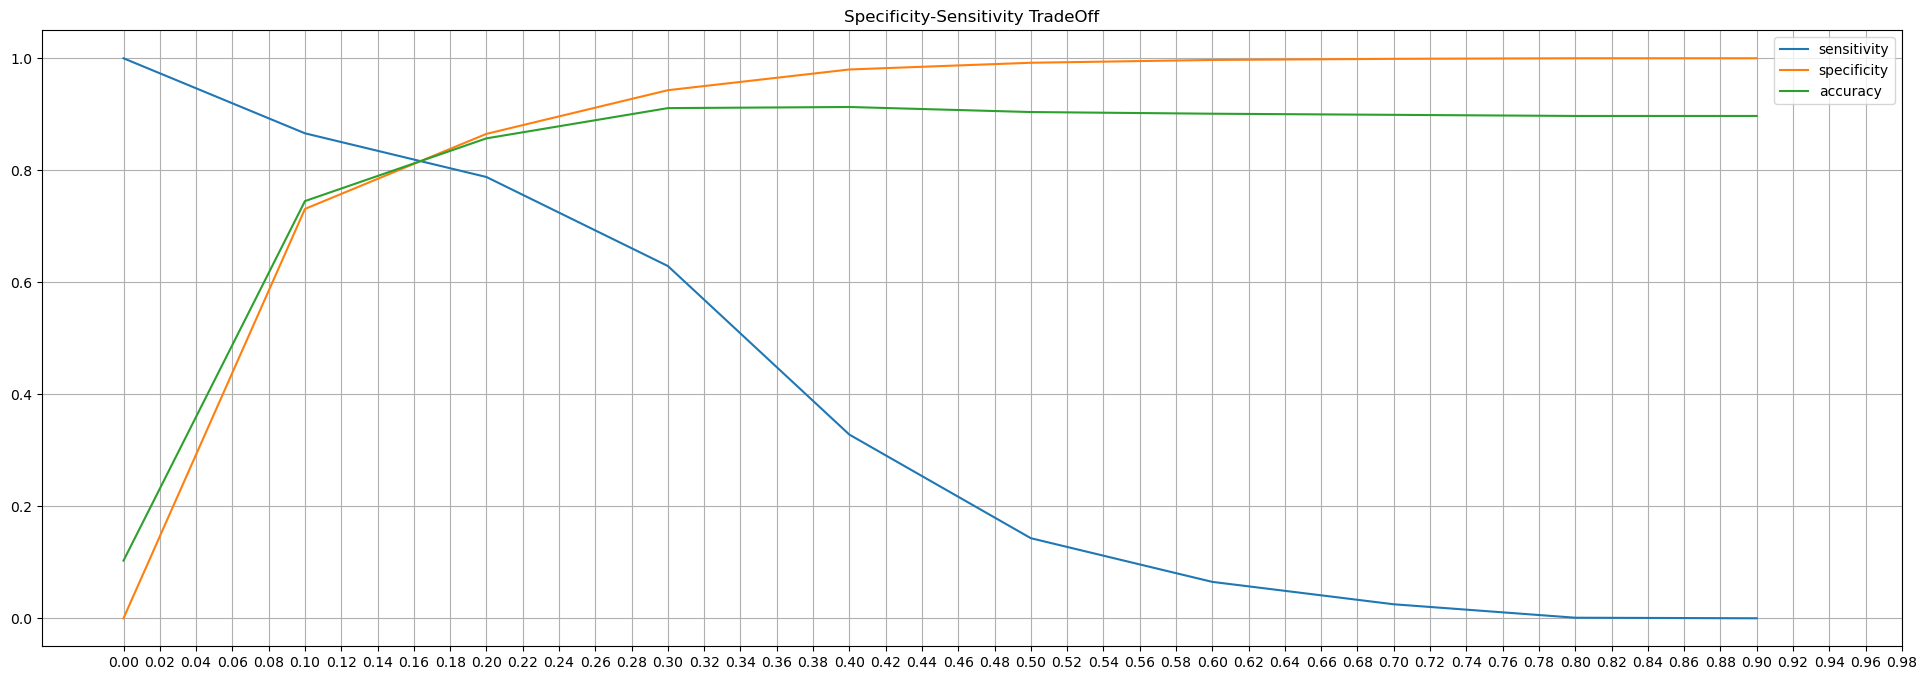

In [129]:
logr_metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

In [130]:
optimum_cutoff = 0.16
y_train_pred_lr_final = y_train_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_lr_final = y_test_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_lr_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[41244  8999]
 [ 1043  4713]]

Confusion Matrix for test: 
 [[10302  2322]
 [  241  1135]]


In [131]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.821
Sensitivity / True Positive Rate / Recall : 0.819
Specificity / True Negative Rate :  0.821
Precision / Positive Predictive Value : 0.344
F1-score : 0.484


Test Performance : 

Accuracy : 0.817
Sensitivity / True Positive Rate / Recall : 0.825
Specificity / True Negative Rate :  0.816
Precision / Positive Predictive Value : 0.328
F1-score : 0.469


In [132]:
# ROC_AUC score 
print('ROC AUC score for Train : ',round(roc_auc_score(y_train, y_train_pred_lr),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred_lr),3) )

ROC AUC score for Train :  0.887 

ROC AUC score for Test :  0.884


In [133]:
lr_summary_html = logr2_fit.summary().tables[1].as_html()
lr_results = pd.read_html(lr_summary_html, header=0, index_col=0)[0]
coef_column = lr_results.columns[0]
print('Most important predictors of Churn , in order of importance and their coefficients are as follows : \n')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most important predictors of Churn , in order of importance and their coefficients are as follows : 



spl_ic_mou_8       -7.8566
const              -0.6462
sachet_2g_8        -0.2520
total_rech_num_8   -0.1524
std_og_t2f_mou_8   -0.0866
total_rech_num_6    0.0662
std_ic_t2f_mou_8   -0.0578
ic_others_8        -0.0359
loc_ic_t2f_mou_8   -0.0306
loc_ic_t2m_mou_8   -0.0227
spl_og_mou_8       -0.0225
og_others_6         0.0216
loc_og_t2c_mou_8    0.0124
roam_og_mou_8       0.0071
isd_og_mou_8        0.0060
Name: coef, dtype: float64

## PCA

In [134]:
from sklearn.decomposition import PCA 
pca = PCA(random_state = 42) 
pca.fit(X_train) # note that pca is fit on original train set instead of resampled train set. 
pca.components_

array([[ 1.95109871e-01,  2.16370066e-01,  2.06644628e-01, ...,
         2.00182256e-02,  1.93993129e-02,  1.57401152e-02],
       [-7.79157041e-03, -1.20687454e-02, -7.33734182e-03, ...,
         6.91842686e-03,  5.56374364e-03,  4.82554474e-03],
       [ 9.93407811e-02,  9.48861530e-02,  9.81853046e-02, ...,
         1.83012138e-01,  1.83537227e-01,  1.59944090e-01],
       ...,
       [ 6.85537579e-05, -2.81758121e-04,  2.05346443e-04, ...,
        -8.42449344e-05,  1.17014146e-04, -5.00061311e-05],
       [ 2.43229626e-05,  5.33442939e-06,  1.72465866e-05, ...,
         1.40384228e-06,  1.90774059e-06, -2.39949680e-06],
       [ 3.02088835e-05,  9.89929401e-06, -7.40904385e-06, ...,
         4.48010353e-07,  2.67768458e-06,  1.04515563e-06]])

In [135]:
pca.explained_variance_ratio_

array([2.96630242e-01, 2.60698748e-01, 1.05565752e-01, 7.21416641e-02,
       5.24090227e-02, 3.53708036e-02, 2.60168947e-02, 2.27585523e-02,
       1.69823677e-02, 1.33793239e-02, 9.49691695e-03, 8.66521350e-03,
       7.45813129e-03, 6.20620401e-03, 5.95737273e-03, 5.55312818e-03,
       5.48356569e-03, 4.89369736e-03, 4.34957918e-03, 3.52912897e-03,
       3.25994851e-03, 2.71873023e-03, 2.70265883e-03, 2.18788188e-03,
       2.12584961e-03, 1.78746742e-03, 1.60555805e-03, 1.56110540e-03,
       1.50698779e-03, 1.37250770e-03, 1.28334819e-03, 1.15224964e-03,
       1.04613441e-03, 7.97833129e-04, 7.94004432e-04, 7.71091567e-04,
       7.38400804e-04, 6.92564198e-04, 6.66873784e-04, 5.99794188e-04,
       5.41105909e-04, 4.77720148e-04, 4.56802912e-04, 4.44346497e-04,
       4.37186363e-04, 4.23395433e-04, 3.88689842e-04, 3.81515516e-04,
       3.15984351e-04, 2.91268089e-04, 2.86834097e-04, 2.61601951e-04,
       2.42779274e-04, 1.85359792e-04, 1.64806048e-04, 1.53201428e-04,
      

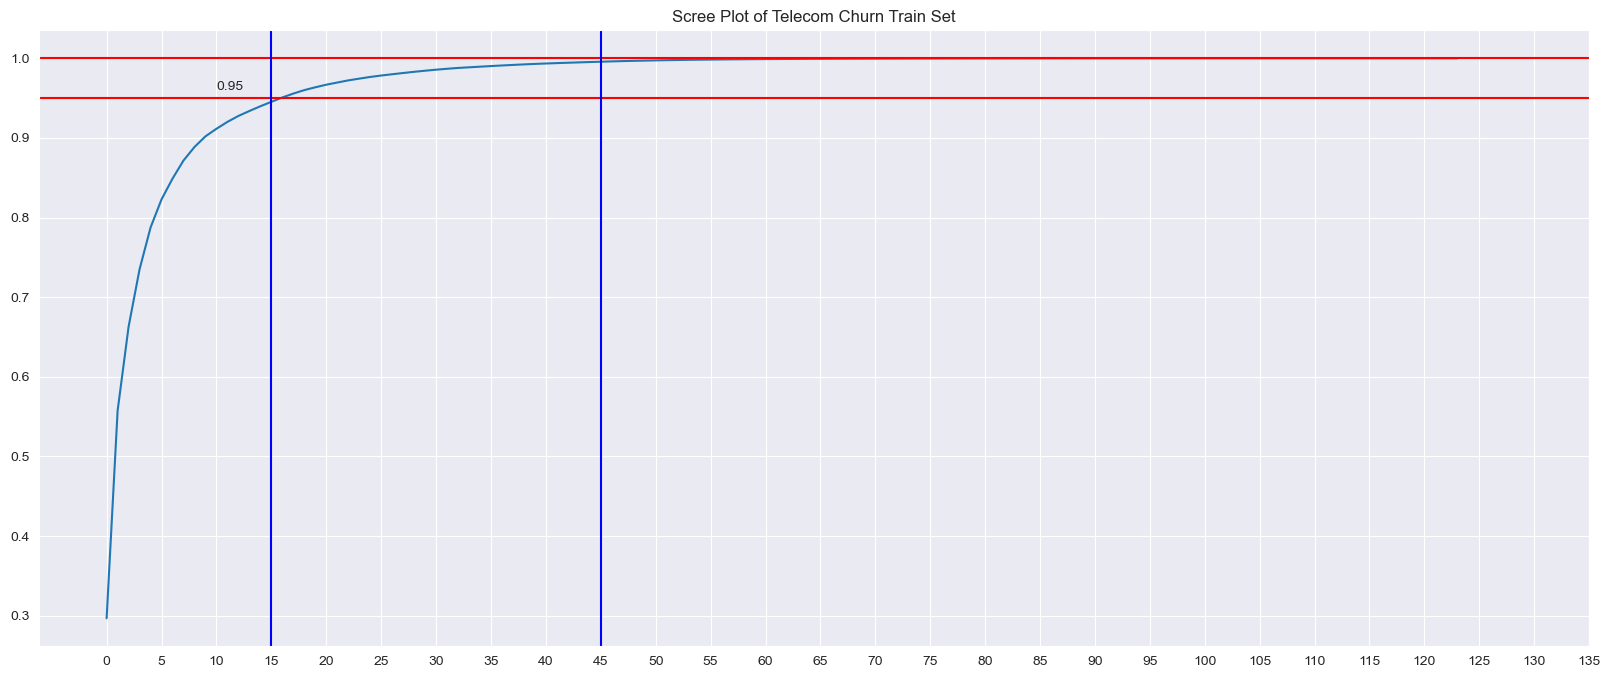

In [136]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.lineplot(var_cum)
plt.xticks(np.arange(0,140,5))
plt.axhline(0.95,color='r')
plt.axhline(1.0,color='r')
plt.axvline(15,color='b')
plt.axvline(45,color='b')
plt.text(10,0.96,'0.95')

plt.title('Scree Plot of Telecom Churn Train Set');

In [137]:
pca_final = PCA(n_components=60, random_state=42)
transformed_data = pca_final.fit_transform(X_train)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,61)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

X_test_pca = pca_final.transform(X_test)

data_train_pca.head()

PC_1        PC_2        PC_3        PC_4        PC_5        PC_6  \
id                                                                              
2691  -874.428561 -857.428345  115.963673 -479.217458  -40.565076  185.587634   
48102 -961.966885 -379.451993 -175.992990   14.571460  136.954736  -67.899645   
9743   331.387734  913.065643 -733.751196  611.061590 -869.374488 -131.835657   
22357  495.583362 -220.931245  131.936822 -910.609684 -261.477932  621.669610   
4442  -852.875369 -891.725599 -116.664909 -116.118441    1.010326  104.241893   

             PC_7        PC_8        PC_9       PC_10       PC_11       PC_12  \
id                                                                              
2691  -355.673546 -132.216398 -136.690103   15.745249 -101.318590  -11.998861   
48102   40.601108  -56.350533   29.643097   33.830821  -50.651869   21.347516   
9743    73.957582  915.093833   55.227563  183.799008   18.546393 -144.970952   
22357 -936.351423  267.198073 -335.452290   46.768186 -119.462851  -24.907341   
4442     2.143626    8.597308   48.462107  -10.998635  -52.652145  -10.935705   

            PC_13      PC_14       PC_15       PC_16      PC_17       PC_18  \
id                                                                            
2691    84.388700 -14.691366  269.022105   -9.103159  54.763909  127.221775   
48102   78.097799 -15.180560    6.116470   52.652094 -40.133659    7.046882   
9743   260.840539  -8.925793   12.555982  101.423157  13.921906  156.770186   
22357  -92.615862 -40.781019  -73.406411  192.806615 -24.865789   93.019199   
4442    -2.128332 -13.850891  -36.607264  -26.249622  -4.302206   23.615867   

            PC_19       PC_20      PC_21       PC_22       PC_23       PC_24  \
id                                                                             
2691   428.084946  306.781854 -92.236845   30.422934 -200.629097  -61.005502   
48102  -27.994077   29.634391 -47.438873   25.067155  -10.796934   -4.659435   
9743    34.007691  120.498445  -4.399935 -118.159729   15.072269   11.516904   
22357  259.134318 -175.598630  24.834301   -5.925668  206.985419  294.879939   
4442   -24.954851   25.726661 -23.193571   17.066436    6.146783   14.815077   

           PC_25       PC_26      PC_27       PC_28      PC_29      PC_30  \
id                                                                          
2691  -14.329628 -235.206803  70.238829  100.043342  41.122907  23.597985   
48102 -23.317844  -26.182933  -9.201875   -4.465191   1.499936 -26.297380   
9743   21.269722  138.333744 -13.937482  -26.068398 -26.887414  -6.901136   
22357 -30.229510  -18.887916 -36.972832  -61.779919 -61.124219 -36.496339   
4442   -4.116083  -13.739623   3.002330    2.349897   2.213331   7.290447   

           PC_31      PC_32      PC_33       PC_34       PC_35       PC_36  \
id                                                                           
2691   12.486810  -1.815171  94.011301  276.344252  329.310348  160.345557   
48102 -10.506043  -5.110118  16.814137   -7.276577    1.596237   -7.129942   
9743   -6.050443  -1.230692  -9.279651   25.123801   -2.102540   -5.951071   
22357 -85.085136 -24.952526 -43.918499  -18.065316  -95.315399   65.753012   
4442   -2.321199  -1.278780   3.197029   -0.469213   -4.832631   -3.701079   

            PC_37       PC_38       PC_39      PC_40      PC_41      PC_42  \
id                                                                           
2691  -128.521206  104.996264  117.050625 -11.656787 -68.973833  68.134358   
48102   -1.966210    2.012133    4.714861 -26.204717 -12.578464  -4.899619   
9743    43.496326  -35.942711  -36.245566  35.143319  25.472081 -29.176104   
22357   46.667147  -24.829201   79.891562  12.900713  19.816079 -12.434441   
4442   -13.102350   11.779678  -10.432214  -0.641008   7.564555   5.116844   

           PC_43       PC_44      PC_45      PC_46       PC_47      PC_48  \
id                                                 

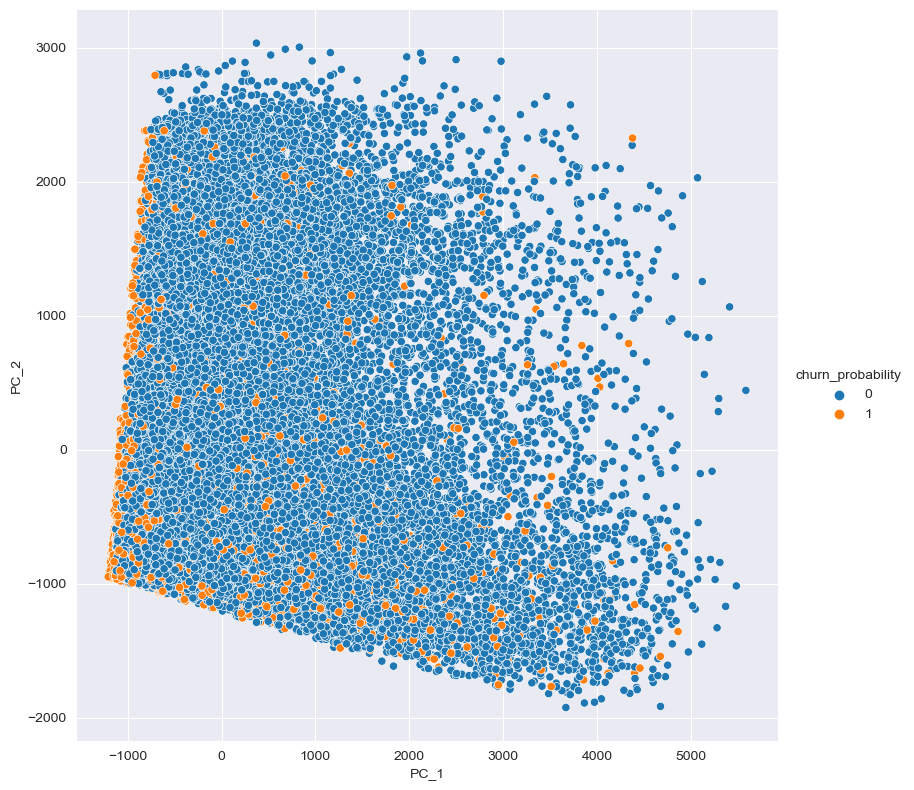

In [138]:
## Plotting principal components 
sns.pairplot(data=data_train_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "churn_probability", size=8);

# PCA + Random Forest

In [139]:
y.value_counts(normalize=True).to_frame()
# Ratio of classes 
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.113


In [140]:
from sklearn.ensemble import RandomForestClassifier

# creating a random forest classifier using pca output

pca_rf = RandomForestClassifier(random_state=42, class_weight= {0 : class_1/(class_0 + class_1) , 1 : class_0/(class_0 + class_1) } , oob_score=True, n_jobs=-1,verbose=1)
pca_rf

RandomForestClassifier(class_weight={0: 0.10188716981671167,
                                     1: 0.8981128301832884},
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1)

In [141]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold
# Hyper parameter Tuning
params = {
    'n_estimators'  : [30,40,50,100],
    'max_depth' : [3,4,5,6,7],
    'min_samples_leaf' : [15,20,25,30]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=pca_rf, param_grid=params, 
                                   cv=folds, scoring='roc_auc', verbose=True, n_jobs=-1 )

pca_rf_model_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.5s
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elap

[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.5s
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent w

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.1s finished
[Parallel(n_jobs=16)]: Using backend Thr

[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend T

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.0s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.8s finished
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Usin

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  3

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.5s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.2s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.0s finishe

[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.2s finished
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.7s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.5s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.4s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.10188716981671167,
                                                            1: 0.8981128301832884},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'n_estimators': [30, 40, 50, 100]},
             scoring='roc_auc', verbose=True)

In [142]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_rf_model_search.best_score_)
print('Best Parameters :', pca_rf_model_search.best_params_)

Best ROC-AUC score : 0.8874142519292484
Best Parameters : {'max_depth': 7, 'min_samples_leaf': 25, 'n_estimators': 100}


In [143]:
# Modelling using the best PCA-RandomForest Estimator 
pca_rf_best = pca_rf_model_search.best_estimator_
pca_rf_best_fit = pca_rf_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_train_pca)
y_train_pred_pca_rf_best[:5]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


array([0, 1, 0, 0, 0])

In [144]:
# Prediction on test set
y_test_pred_pca_rf_best = pca_rf_best_fit.predict(X_test_pca)
y_test_pred_pca_rf_best[:5]

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


array([0, 1, 0, 1, 0])

In [145]:
## PCA - RandomForest Model Performance - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train, y_train_pred_pca_rf_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_rf_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.852
Sensitivity / True Positive Rate / Recall : 0.828
Specificity / True Negative Rate :  0.854
Precision / Positive Predictive Value : 0.394
F1-score : 0.534

Test Performance :

Accuracy : 0.835
Sensitivity / True Positive Rate / Recall : 0.784
Specificity / True Negative Rate :  0.841
Precision / Positive Predictive Value : 0.35
F1-score : 0.484


In [146]:
## out of bag error 
pca_rf_best_fit.oob_score_

0.839836425650458

# 7. Creating submission file

For submission, we need to make sure that the format is exactly the same as the sample.csv file. It contains 2 columns, id and churn_probability

The submission file should contain churn_probability values that have to be predicted for the unseen data provided (test.csv)

In [147]:
rtdtrdytrd
unseen.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

Lets first select the columns that we want to work with (or create them, if you have done any feature engineering)

In [148]:
unseen = unseen.set_index('id')

In [149]:
unseen.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
id                                                                 
69999        109             0.0             0.0             0.0   
70000        109             0.0             0.0             0.0   
70001        109             0.0             0.0             0.0   
70002        109             0.0             0.0             0.0   
70003        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
id                                                                              
69999            6/30/2014            7/31/2014            8/31/2014   91.882   
70000            6/30/2014            7/31/2014            8/31/2014  414.168   
70001            6/30/2014            7/31/2014            8/31/2014  329.844   
70002            6/30/2014            7/31/2014            8/31/2014   43.550   
70003            6/30/2014            7/31/2014            8/31/2014  306.854   

        arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
id                                                                             
69999   65.330   64.445        31.78        20.23        23.11         60.16   
70000  515.568  360.868        75.51        41.21        19.84        474.34   
70001  434.884  746.239         7.54         7.86         8.40         16.98   
70002  171.390   24.400         5.31         2.16         0.00         40.04   
70003  406.289  413.329       450.93       609.03       700.68         60.94   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
id                                                                
69999         32.16         34.83           0.00           0.00   
70000        621.84        394.94           0.00           0.00   
70001         45.81         45.04          22.81         103.38   
70002        205.01         24.01           0.00           0.00   
70003         23.84         74.16           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
id                                                                  
69999           0.00           0.00           0.00           0.00   
70000           0.00           0.00           0.00           0.00   
70001          26.08          24.53          53.68          54.44   
70002           0.00           0.00           0.00           0.00   
70003           0.00           0.00           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
id                                                                              
69999             24.88             20.23             21.06             18.13   
70000             75.51             41.21             19.84            473.61   
70001              0.00              0.00              0.00              0.00   
70002              5.31              0.00              0.00              2.94   
70003              0.45              0.78             14.56              2.39   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
id                                                                              
69999             10.89              8.36              0.00             13.58   
70000            598.08            377.26              0.73              0.00   
70001              0.00              0.00              0.00              0.00   
70002             98.61             20.51              0.00              0.00   
70003              2.66             10.94              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
id                                                                              
69999              0.00               0.0              0.00              0.03   
70000              0.00               0.0              0.00         

In [150]:
derive_variables(unseen)

Next, lets create a new column in the unseen dataset called churn_probability and use the model pipeline to predict the probabilities for this data

In [151]:
unseen = unseen.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)

In [152]:

unseen[impute_cols] = imp.transform(unseen[impute_cols])


KeyError: "None of [Index(['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_9',\n       'PC_10', 'PC_11', 'PC_12', 'PC_13', 'PC_14', 'PC_15', 'PC_16', 'PC_17',\n       'PC_18', 'PC_19', 'PC_20', 'PC_21', 'PC_22', 'PC_23', 'PC_24', 'PC_25',\n       'PC_26', 'PC_27', 'PC_28', 'PC_29', 'PC_30', 'PC_31', 'PC_32', 'PC_33',\n       'PC_34', 'PC_35', 'PC_36', 'PC_37', 'PC_38', 'PC_39', 'PC_40', 'PC_41',\n       'PC_42', 'PC_43', 'PC_44', 'PC_45', 'PC_46', 'PC_47', 'PC_48', 'PC_49',\n       'PC_50', 'PC_51', 'PC_52', 'PC_53', 'PC_54', 'PC_55', 'PC_56', 'PC_57',\n       'PC_58', 'PC_59', 'PC_60'],\n      dtype='object')] are in the [columns]"

In [159]:
unseen_filtered = unseen[X_train.columns.to_list()]
X_unseen = scale.transform(unseen_filtered)

In [160]:
X_unseen_pca = pca_final.transform(X_unseen)

In [169]:
unseen['churn_probability'] = pca_rf_best.predict(X_unseen_pca)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


In [170]:
output = unseen.reset_index()[['id', 'churn_probability']]

In [171]:
output.to_csv('submission.csv', index=False)

In [172]:
output.shape

(30000, 2)